## 회수 데이터를 전처리하고 회수 데이터의 특성을 파악합니다.

#### 1. 모듈을 불러옵니다.

In [1]:
import os, sys
path_name= os.path.dirname(os.path.abspath(os.path.dirname(os.getcwd())))
sys.path.append(path_name)
print(path_name)

C:\Studying\Project_Nextop\nextop-engine\nextop_engine


In [2]:
from _element import feature_control as ft_c
from _element.data_control import Data, DataRestruction, DataAddition
from _element import varr
from _element import calculations as calc
from _element.result_control import Result

from _alg.prophet import Prophet_timeseries
from _alg.arima import Arima_timeseries

from _evaluation.cross_validation import Cross_Validation

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

#### 2. 한 폴더 안에 있는 모든 데이터를 불러와 유형/일자별로 재구성합니다.

이 과정에서 오류가 있어 상식적인 수준보다 훨씬 낮은 양의 데이터가 집계되었습니다. 이를 수정해야 합니다.

In [ ]:
data_return= Data()
merge_data= pd.DataFrame()
for full_name in ft_c.dir_list(varr.PJ_DIR+ '\\_element\\data\\private_return\\Rawdata', '.csv'):
    INPUT_FILENAME= full_name.split('\\')[-1]
    print(INPUT_FILENAME)
    df_raw= pd.read_csv(full_name, engine= 'python', encoding= 'euc-kr')
    data_return.setRawData(df_raw, rawdata_setting= True)
    restruct= DataRestruction(data_return)
    restruct.groupbyObject(idx_col= '발송일', ft_col= '유형', val_col= '수량', y_sum= True, idx_to_datetime= True)
    restruct.data[frozenset({'raw'})].columns= restruct.data[frozenset({'raw'})].columns.map(lambda x: int(x) if type(x)==float else x)
    restruct.commitRestructedData()
    merge_data= pd.concat([merge_data, data_return.data[frozenset({'raw'})]], axis= 0)

In [ ]:
merge_data= merge_data.sort_values(by= ['ds']).fillna(0)

In [ ]:
merge_data= merge_data.groupby(['ds'], as_index= False).sum()

In [ ]:
merge_data

#### 3. 재구성한 데이터를 pickle 데이터와 엑셀 파일로 저장합니다.

In [ ]:
merge_data.to_pickle('C:\\Studying\\Project_Nextop\\nextop-engine\\nextop_engine\\_element\\data\\private_return\\KPP일별회수(13_17)_daily_obj.pickle')

In [ ]:
df2013.head()

In [ ]:
ft_c.save_as_xlsx('C:\\Studying\\Project_Nextop\\nextop-engine\\nextop_engine\\_element\\data\\private_return\\', merge_data, 'KPP일별회수(13_17).xlsx', '_daily_obj')

#### 4. 재구성한 데이터를 불러와 회수 데이터의 주기성을 파악합니다.

In [4]:
df_return= ft_c.xlsx_opener('KPP일별회수(13_17)_daily_obj.xlsx')

In [5]:
df_return.head()

,ds,1025,1032,1041,1057,1064,1091,1101,1117,1119,...,1797,1800,1815,1817,1818,1852,1853,1878,1891,y_sum
0,2013-01-01,0,0,81,0,0,0,0,0,0,...,0,0,7681,0,0,0,0,0,0,8374
1,2013-01-02,0,0,326,0,0,1,0,0,0,...,1,0,20876,0,0,0,100,181,0,26423
2,2013-01-03,0,0,312,0,0,0,0,0,0,...,1,0,22693,0,0,0,259,241,0,28156
3,2013-01-04,0,0,586,0,0,2,0,0,0,...,94,0,22571,0,0,0,252,455,2,29636
4,2013-01-05,0,0,218,0,0,0,0,0,0,...,0,0,21062,0,0,0,1150,211,2,27707


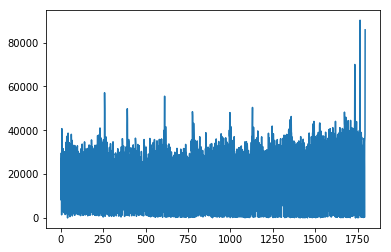

In [6]:
df_return.y_sum.plot()
plt.show()

In [7]:
data_return= Data()
data_return.setRawData(df_return)

          ds  1025  1032  1041  1057  1064  1091  1101  1117  1119  ...    \
0 2013-01-01     0     0    81     0     0     0     0     0     0  ...     
1 2013-01-02     0     0   326     0     0     1     0     0     0  ...     
2 2013-01-03     0     0   312     0     0     0     0     0     0  ...     
3 2013-01-04     0     0   586     0     0     2     0     0     0  ...     
4 2013-01-05     0     0   218     0     0     0     0     0     0  ...     

   1797  1800   1815  1817  1818  1852  1853  1878  1891  y_sum  
0     0     0   7681     0     0     0     0     0     0   8374  
1     1     0  20876     0     0     0   100   181     0  26423  
2     1     0  22693     0     0     0   259   241     0  28156  
3    94     0  22571     0     0     0   252   455     2  29636  
4     0     0  21062     0     0     0  1150   211     2  27707  

[5 rows x 40 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 40 columns):
ds       17

In [9]:
restruct= DataRestruction(data_return)

In [10]:
restruct.addRegion(7, 'weekday', start_num= 1)

In [11]:
restruct.commitRestructedData()

          ds  1025  1032  1041  1057  1064  1091  1101  1117  1119   ...     \
0 2013-01-01     0     0    81     0     0     0     0     0     0   ...      
1 2013-01-02     0     0   326     0     0     1     0     0     0   ...      
2 2013-01-03     0     0   312     0     0     0     0     0     0   ...      
3 2013-01-04     0     0   586     0     0     2     0     0     0   ...      
4 2013-01-05     0     0   218     0     0     0     0     0     0   ...      

   1800   1815  1817  1818  1852  1853  1878  1891  y_sum  weekday  
0     0   7681     0     0     0     0     0     0   8374        1  
1     0  20876     0     0     0   100   181     0  26423        2  
2     0  22693     0     0     0   259   241     0  28156        3  
3     0  22571     0     0     0   252   455     2  29636        4  
4     0  21062     0     0     0  1150   211     2  27707        5  

[5 rows x 41 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (

* 회수 데이터의 경우 특정 유형이 한 연도에서 회수되지 않은 경우가 나타났습니다. 이 때문에 특정 팔레트의 회수량이 없는 대신 다른 팔레트의 회수량이 급증했습니다. 이와 관련된 팔레트 유형은 1853, 1261, 1692, 1815입니다. 이를 그래프로 나타냈을 때 큰 문제가 없는 것으로 보입니다.

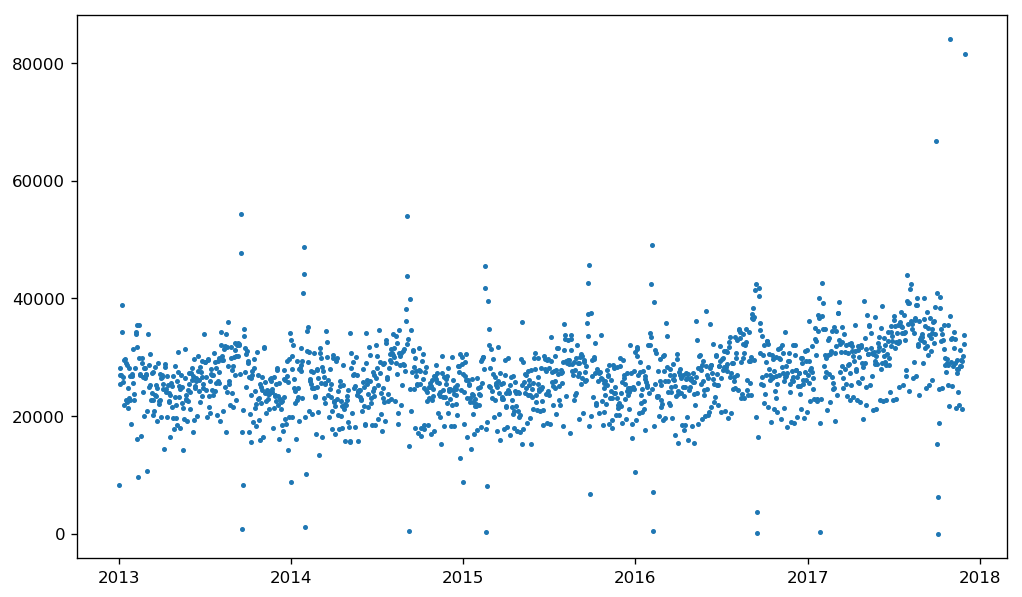

In [34]:
Arima_timeseries().plot(
    data_return.grabdata[data_return.grabdata['weekday']!= 6].ds,
    (data_return.grabdata[data_return.grabdata['weekday']!= 6][1853]+
     data_return.grabdata[data_return.grabdata['weekday']!= 6][1261]+
     data_return.grabdata[data_return.grabdata['weekday']!= 6][1692]+
    data_return.grabdata[data_return.grabdata['weekday']!= 6][1815]))

In [23]:
col_list= data_return.grabdata.columns.values.tolist()

In [24]:
col_list.remove('ds')

In [27]:
col_list.remove('weekday')

In [30]:
col_list.append('y_sum')

Object 1025:


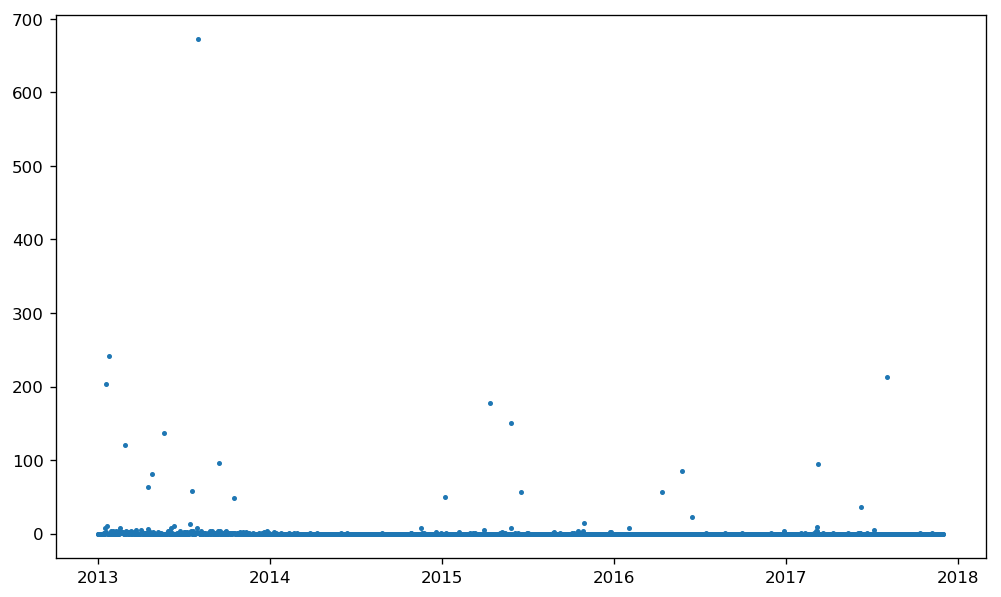

Object 1032:


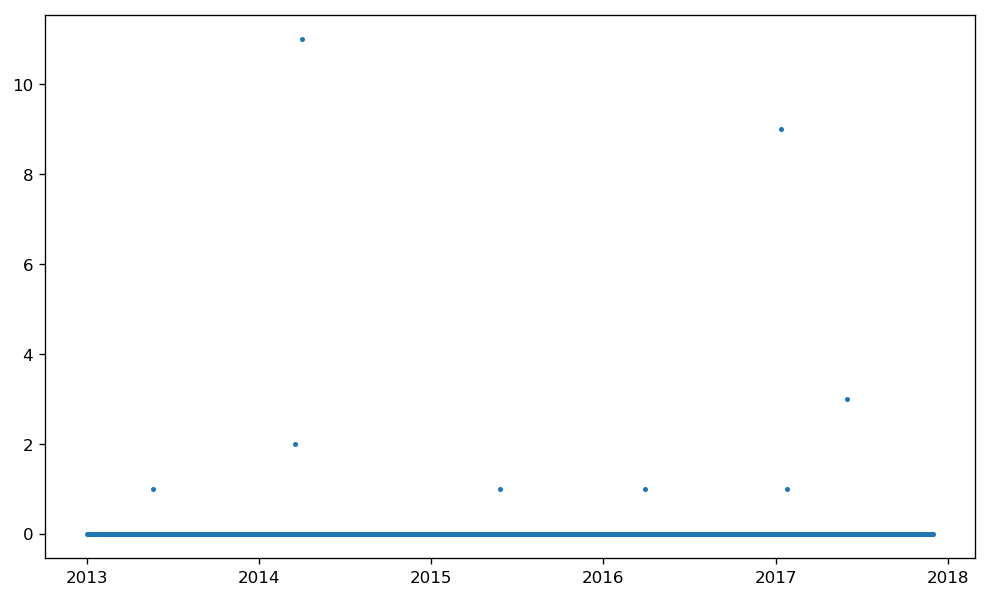

Object 1041:


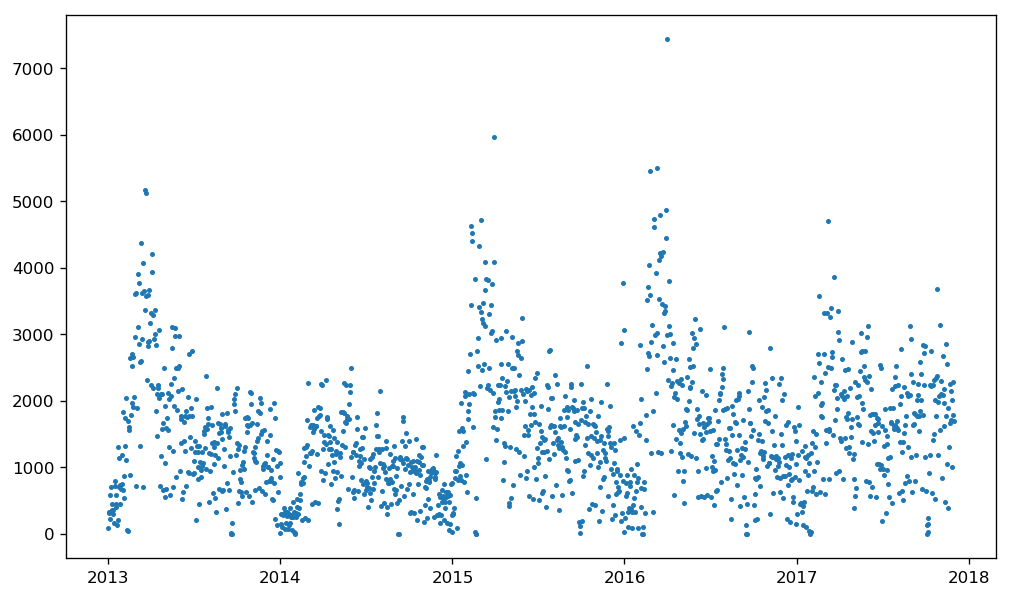

Object 1057:


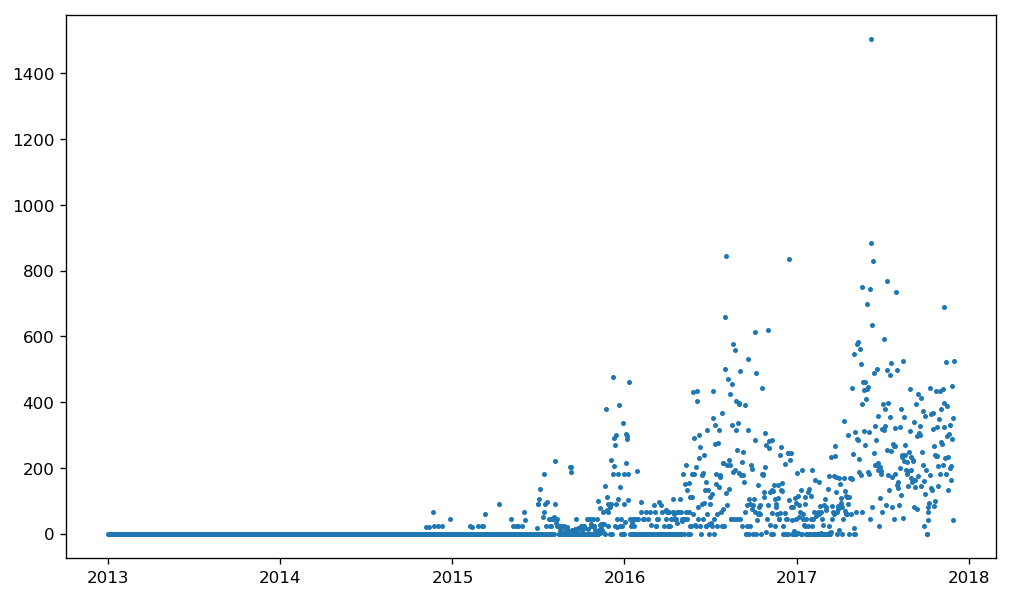

Object 1064:


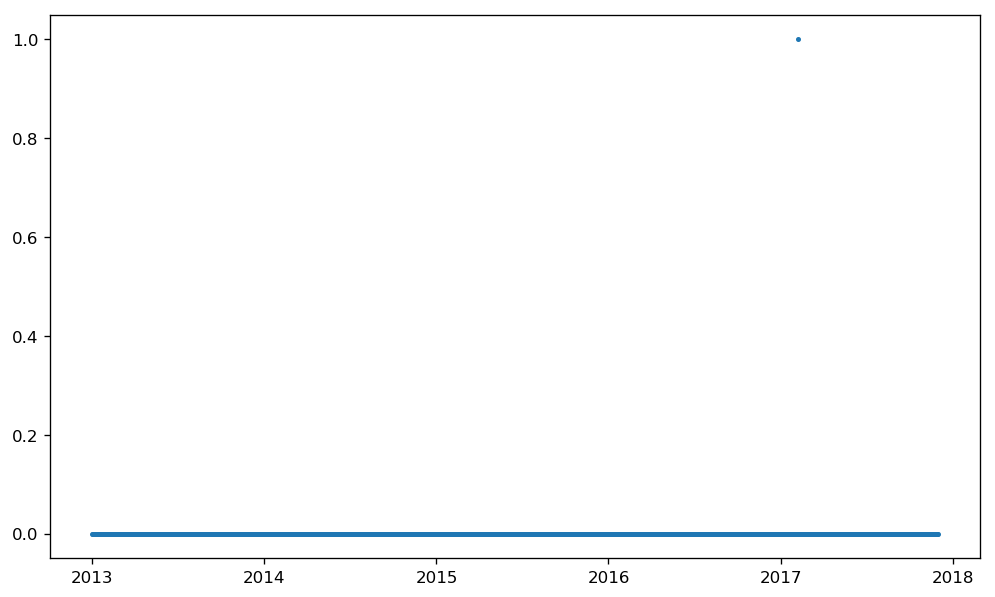

Object 1091:


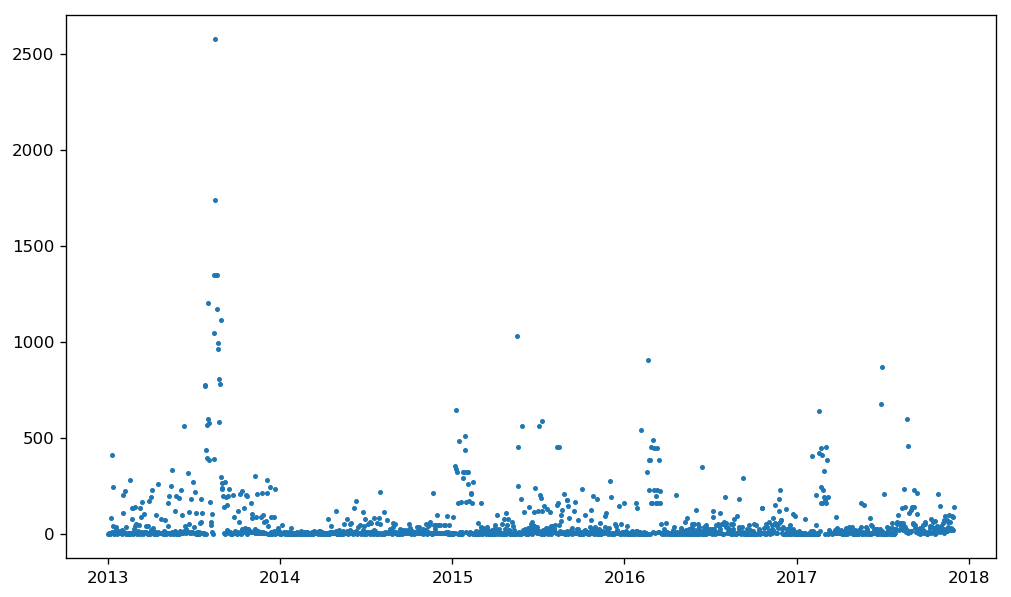

Object 1101:


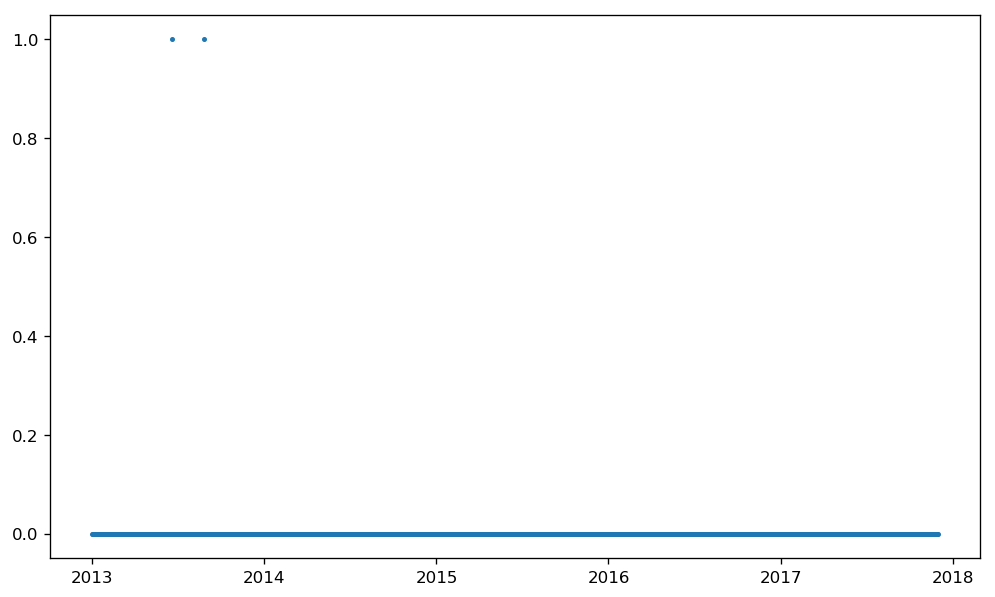

Object 1117:


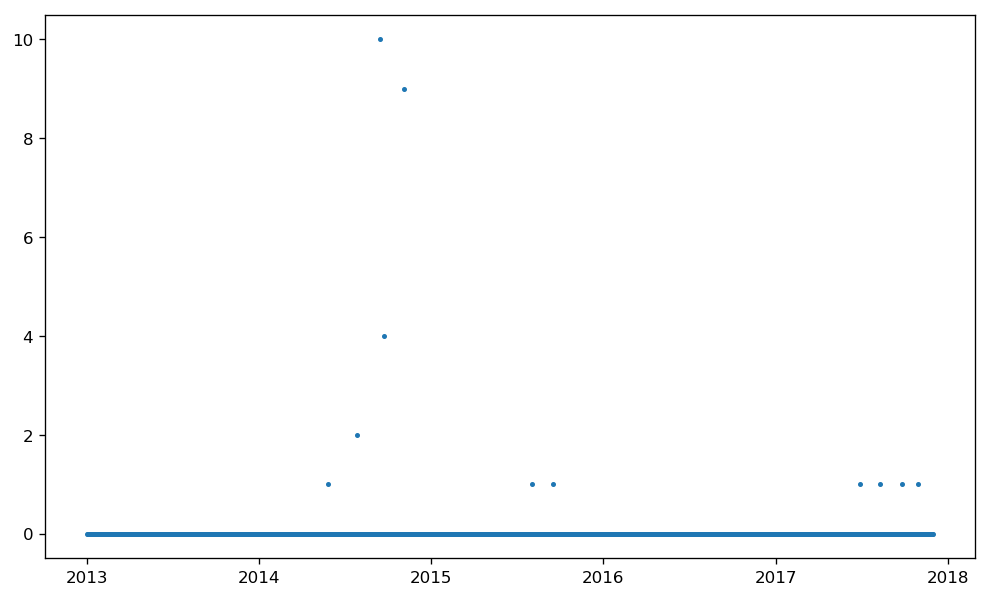

Object 1119:


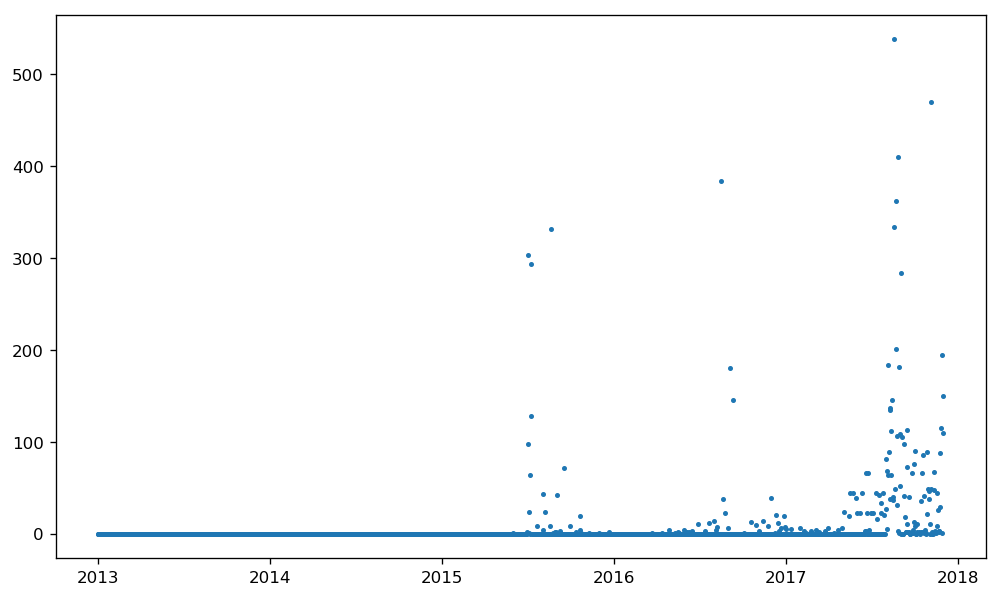

Object 1127:


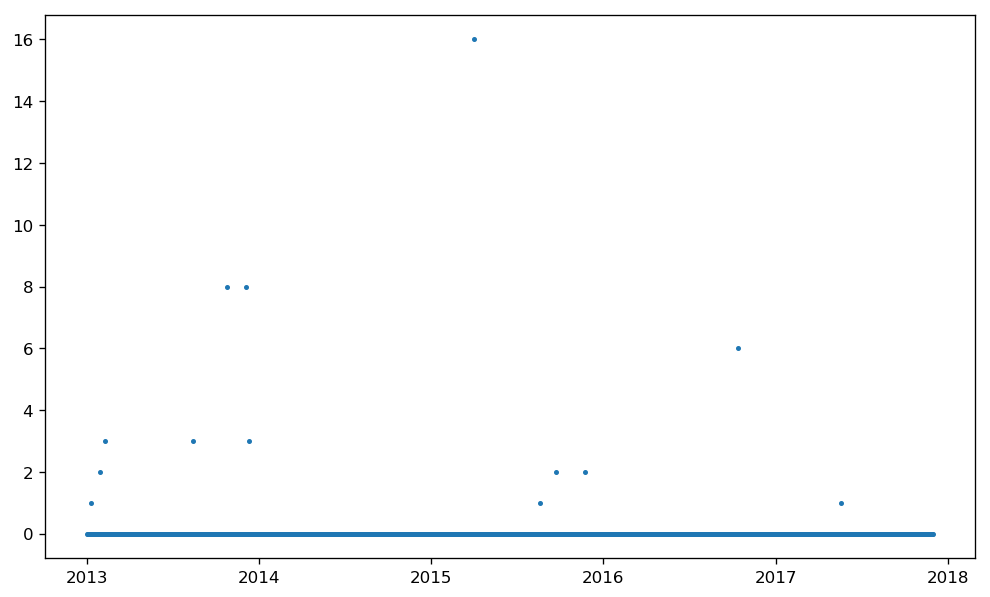

Object 1163:


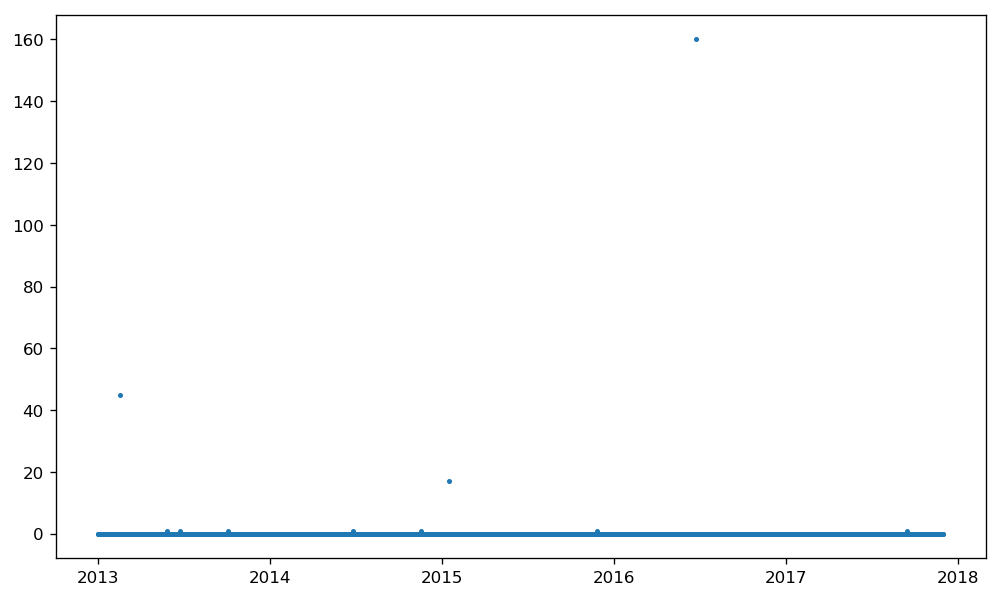

Object 1216:


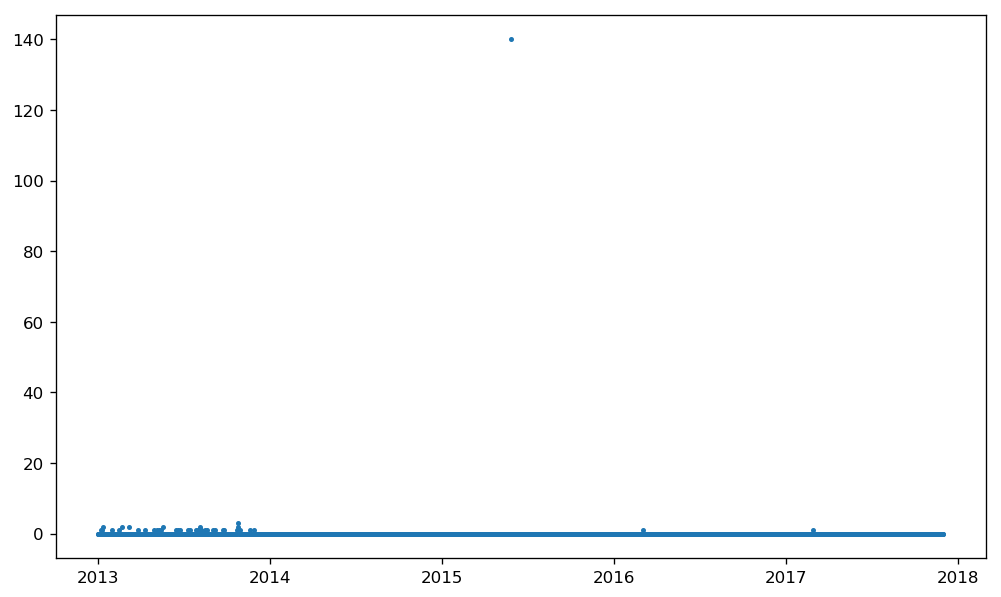

Object 1224:


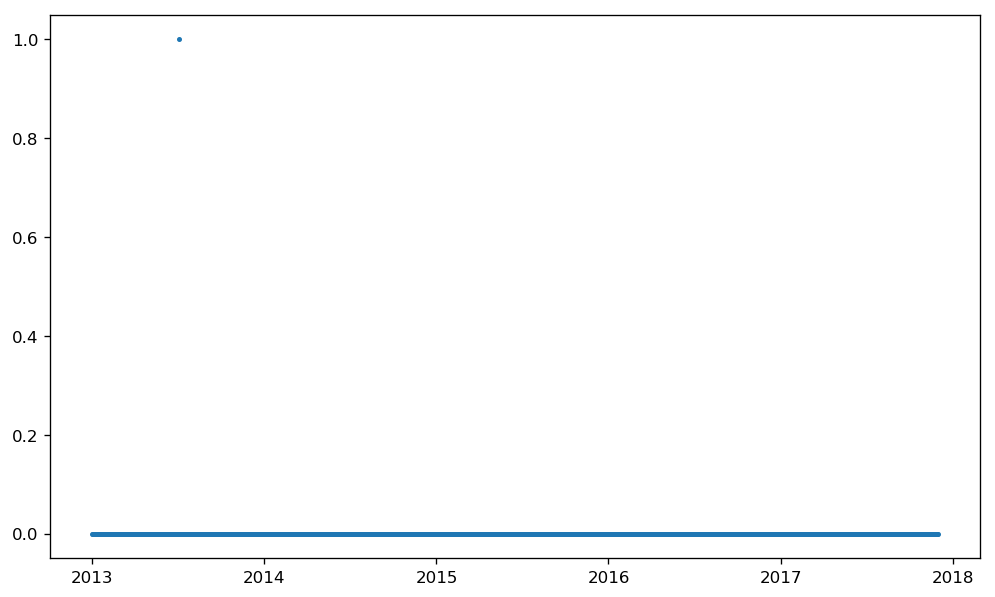

Object 1242:


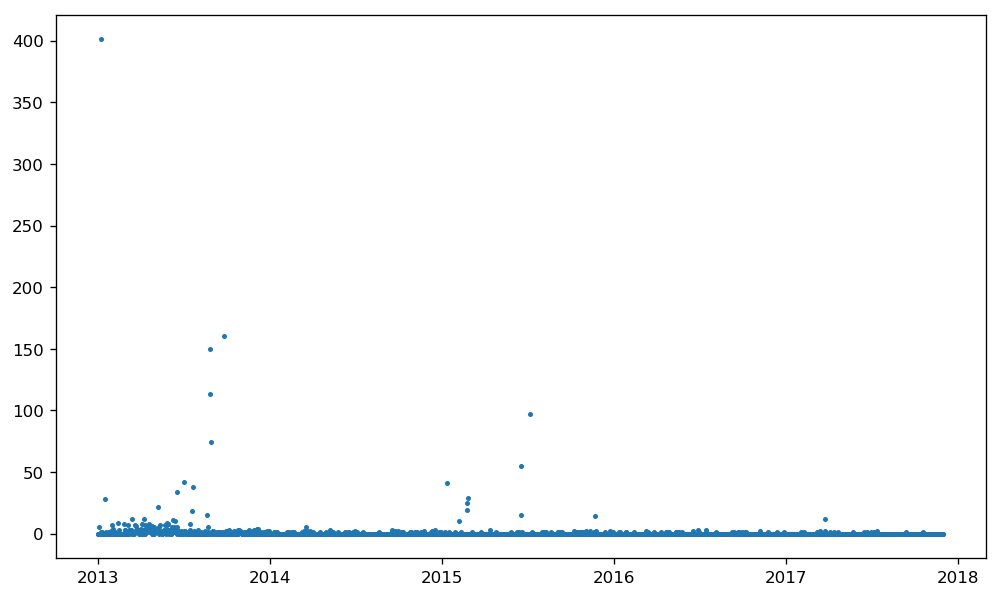

Object 1261:


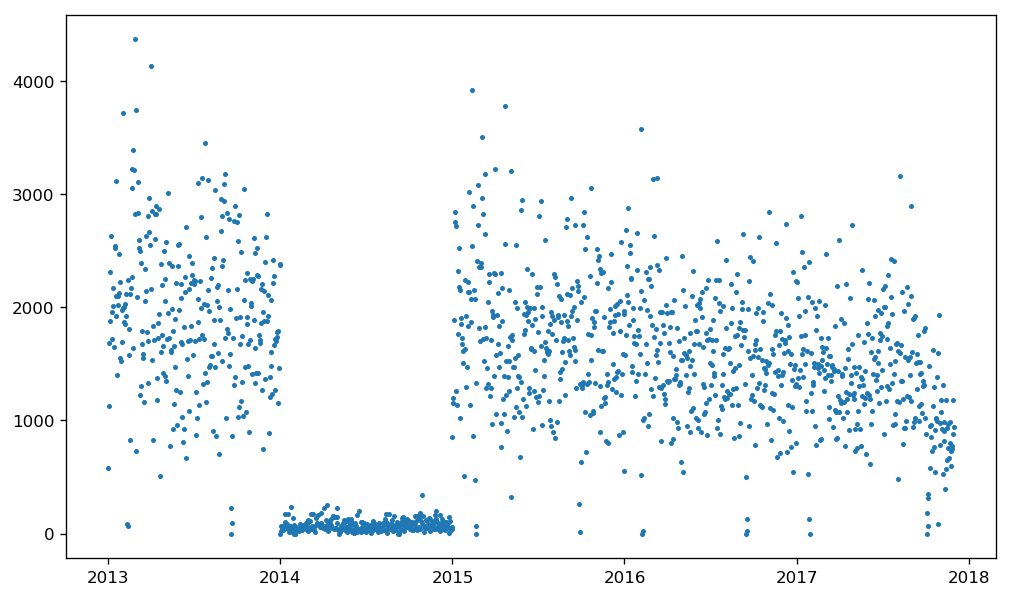

Object 1298:


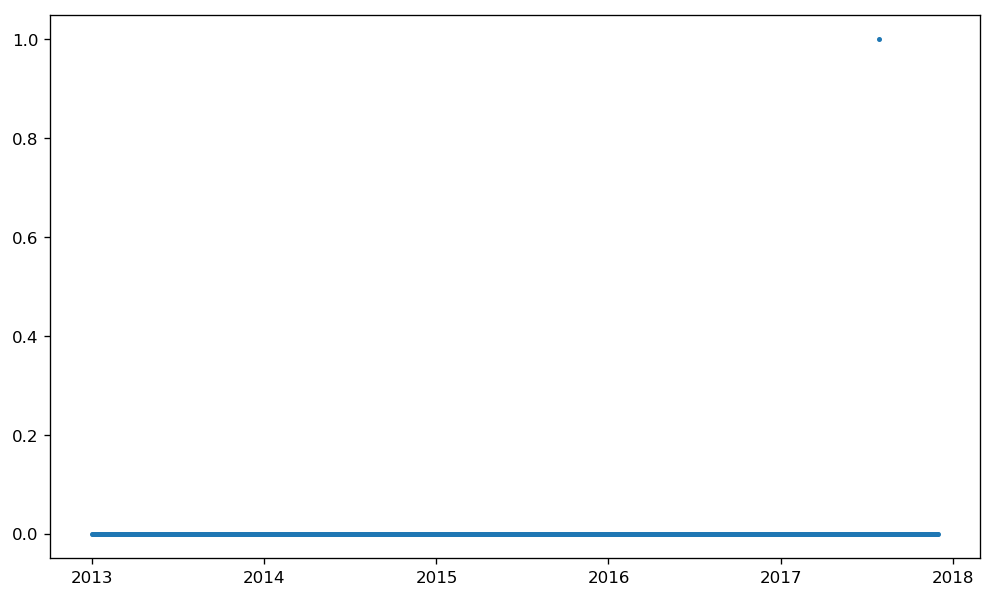

Object 1355:


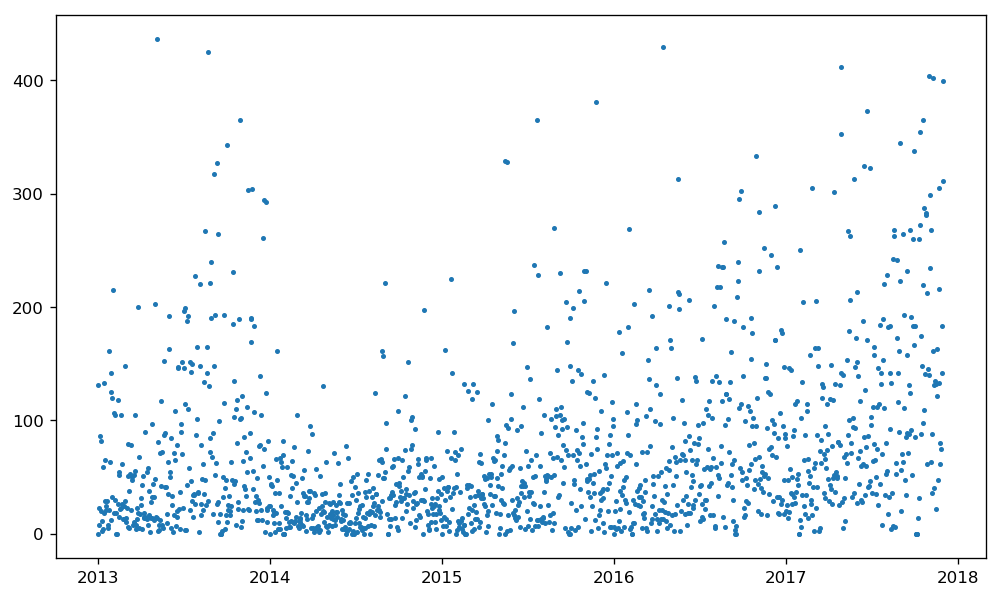

Object 1373:


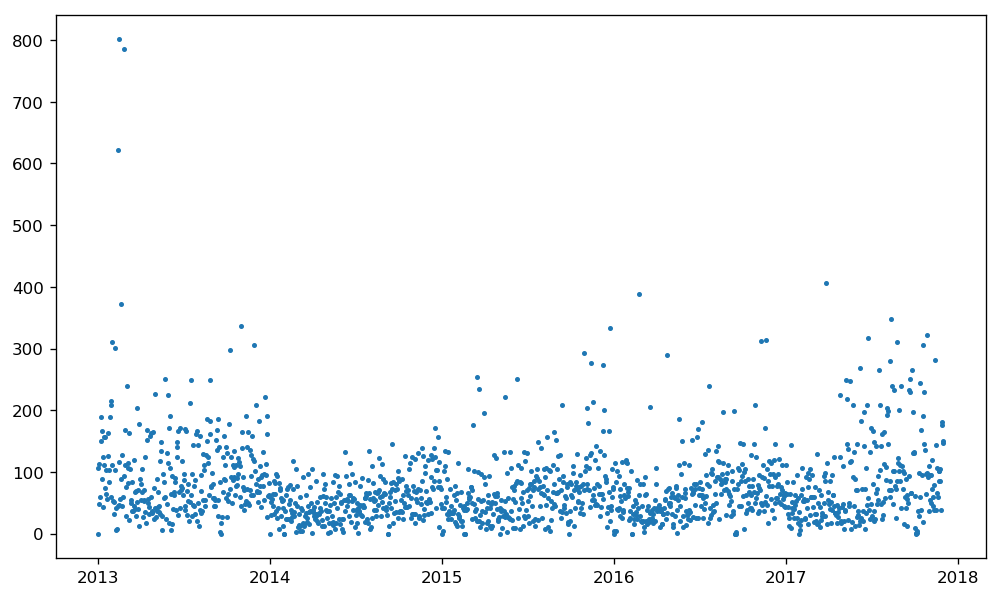

Object 1375:


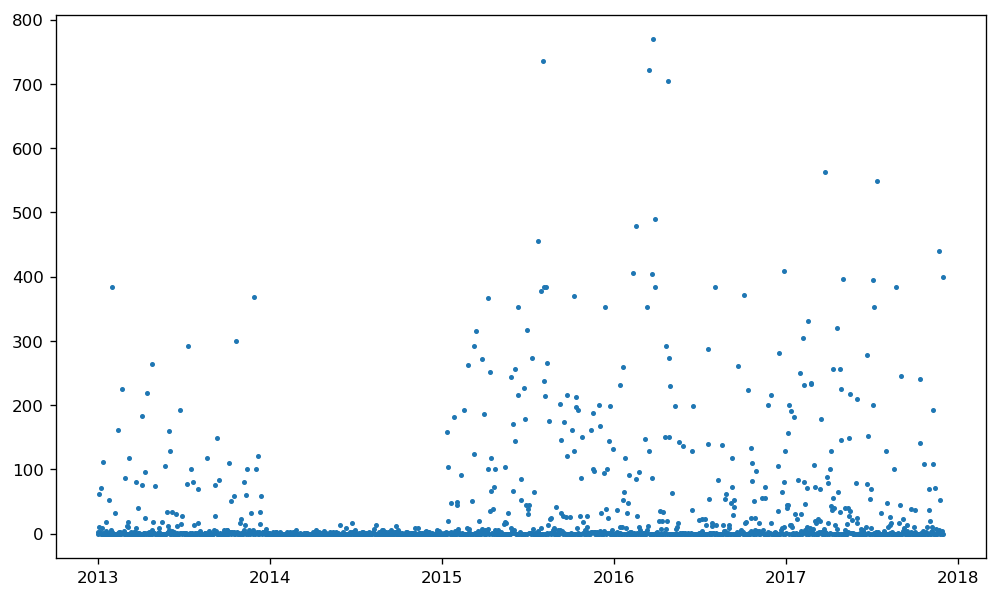

Object 1376:


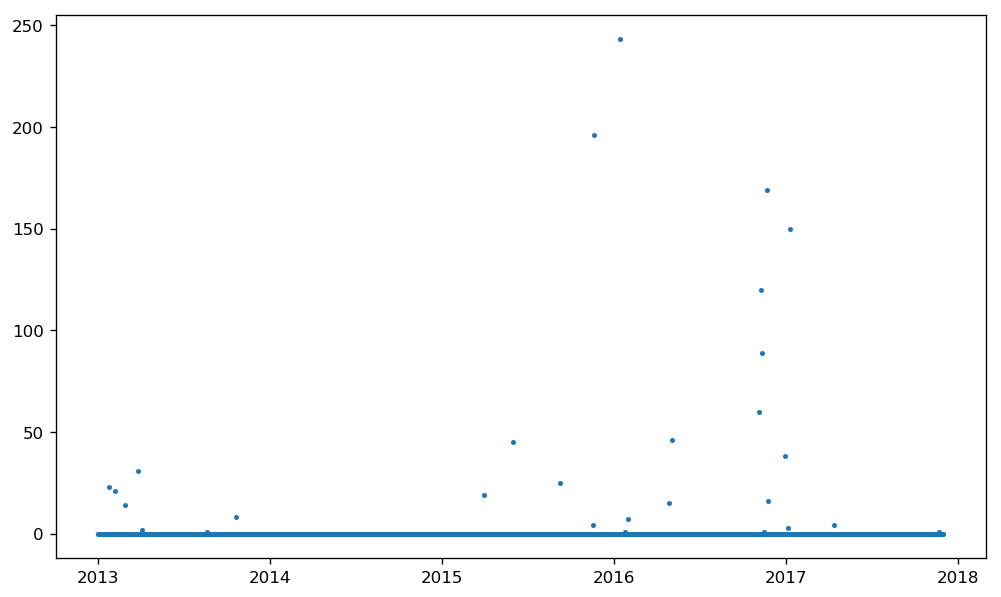

Object 1396:


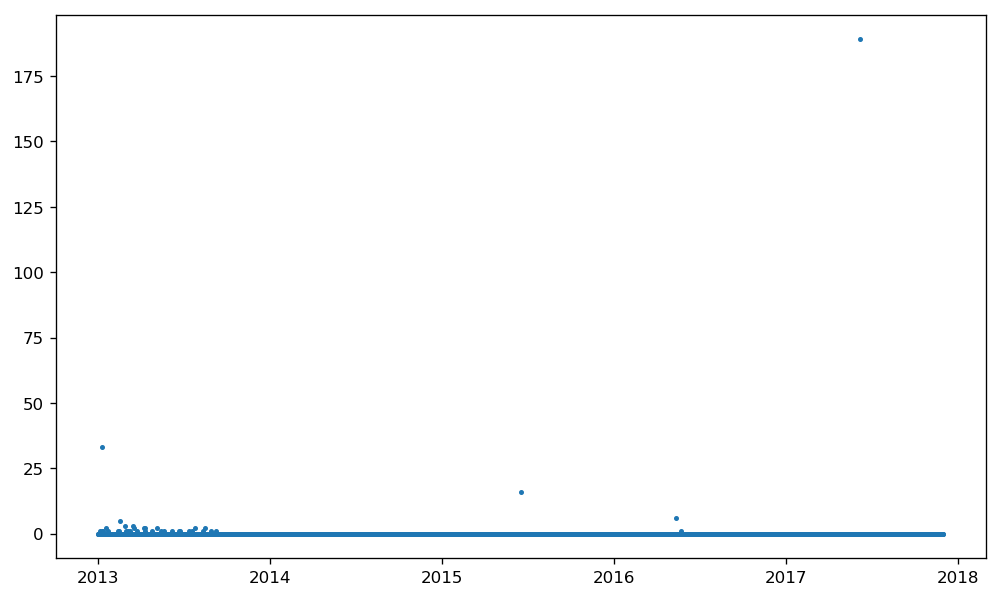

Object 1466:


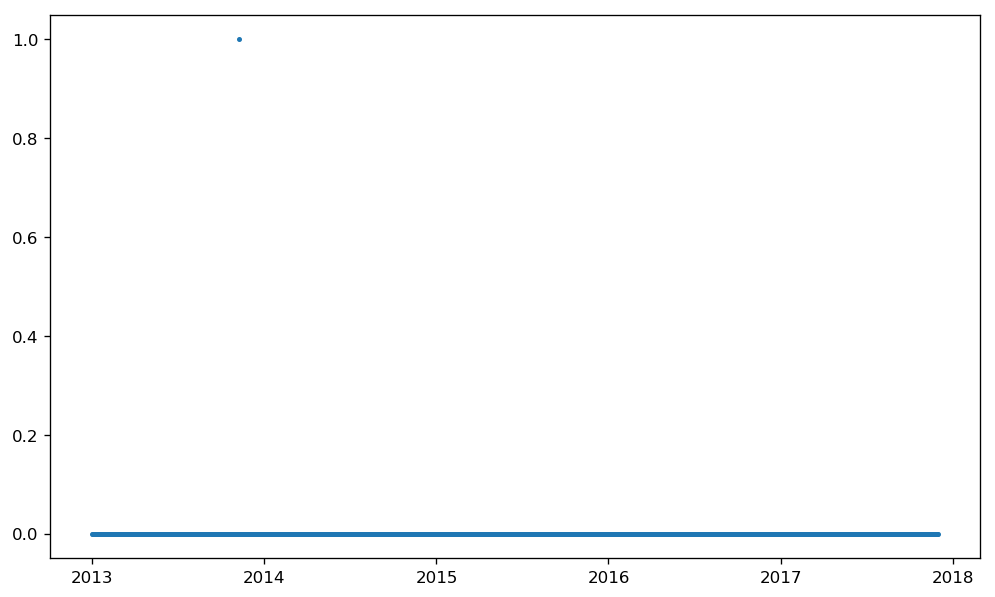

Object 1627:


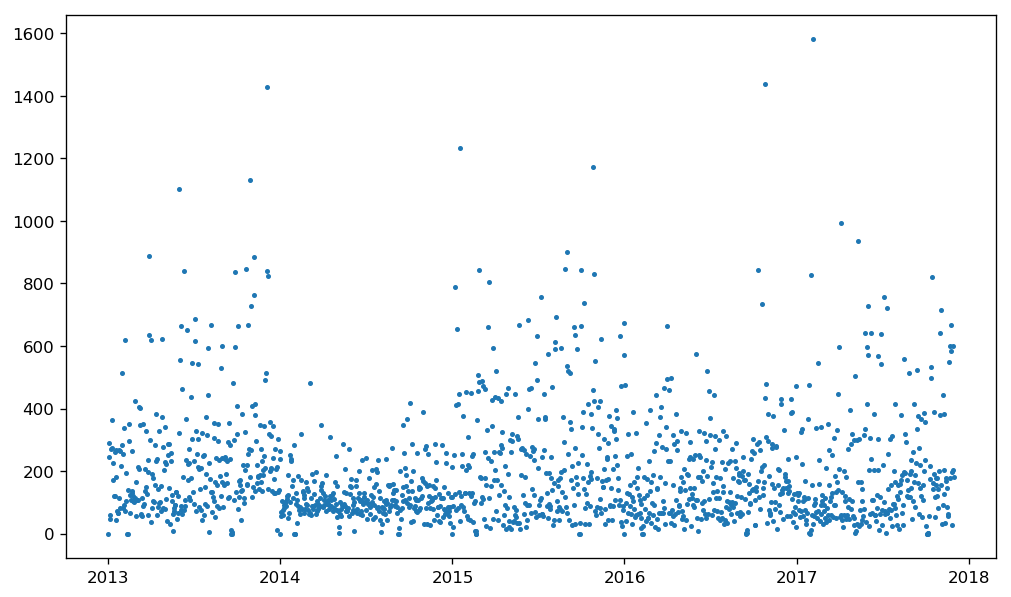

Object 1652:


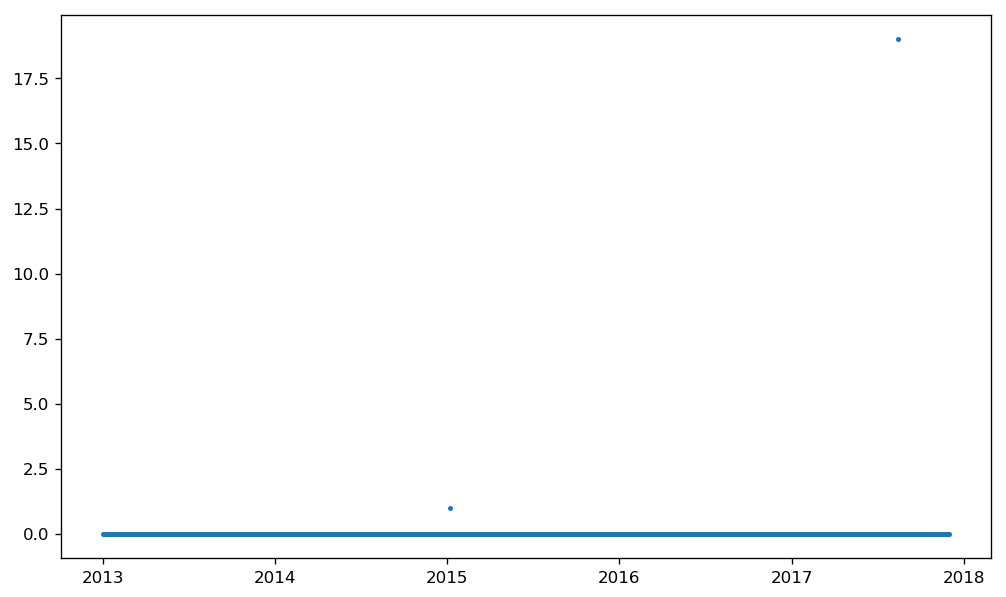

Object 1656:


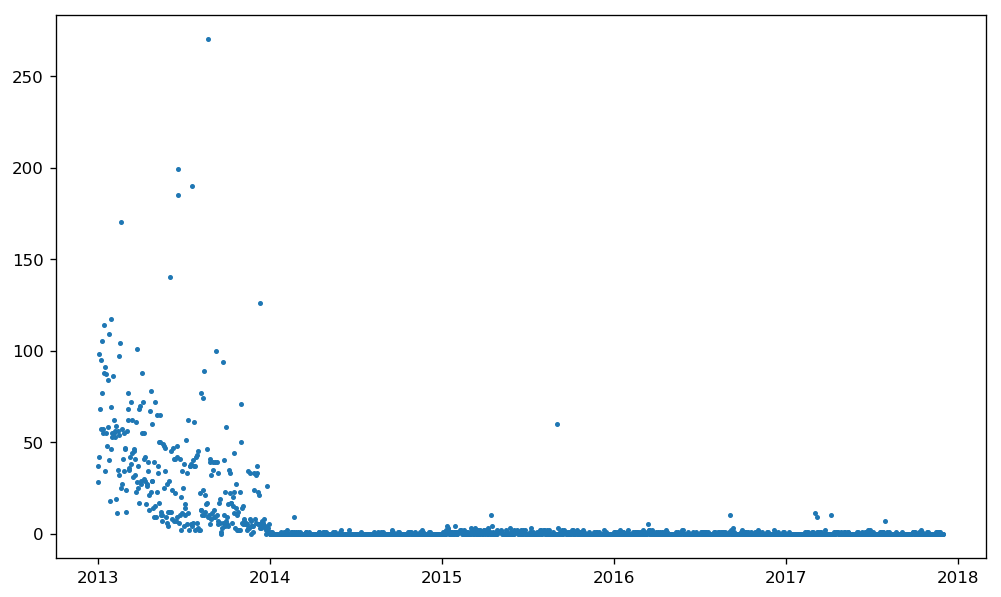

Object 1692:


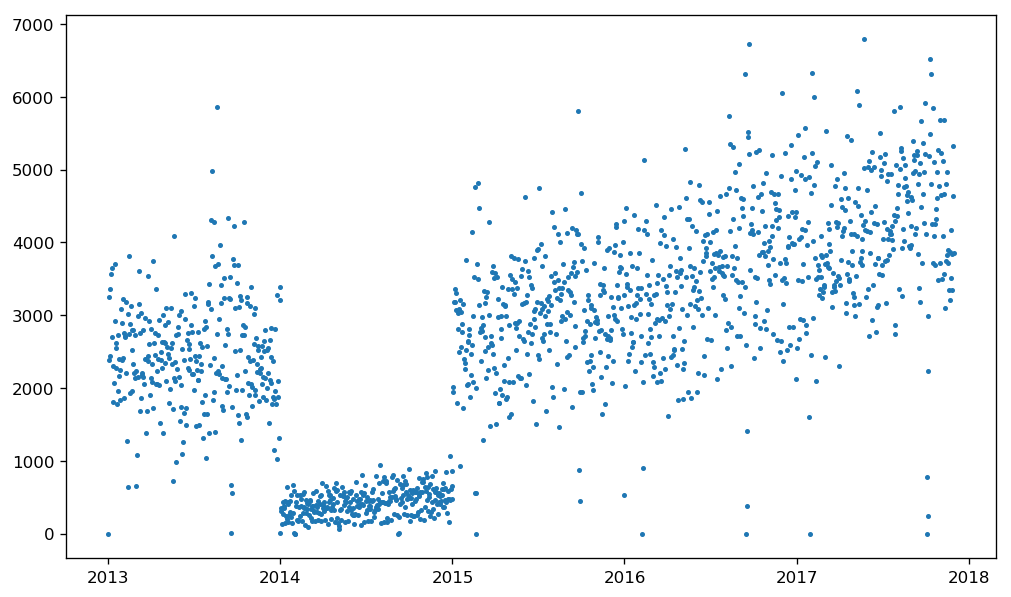

Object 1729:


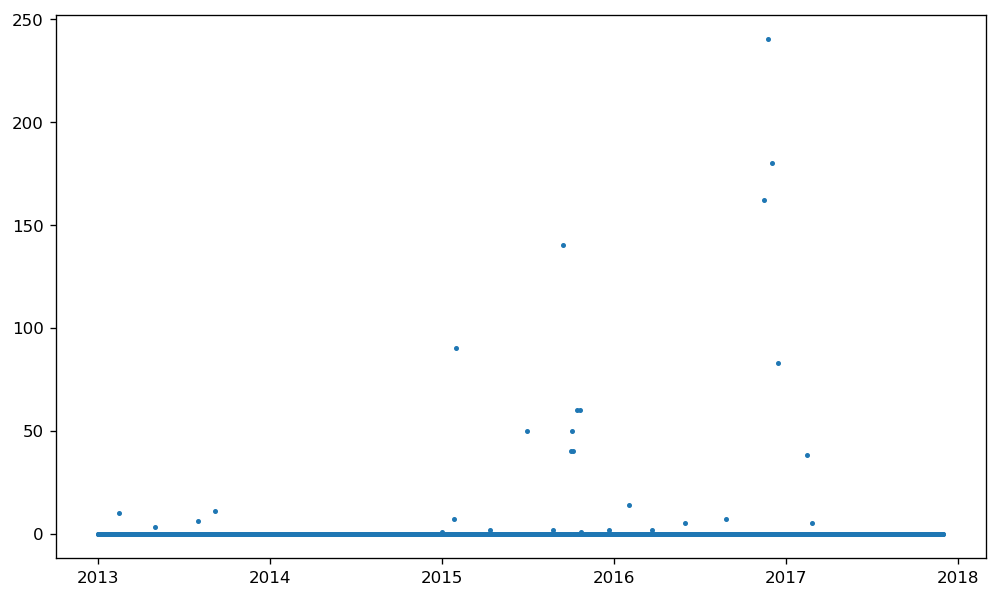

Object 1745:


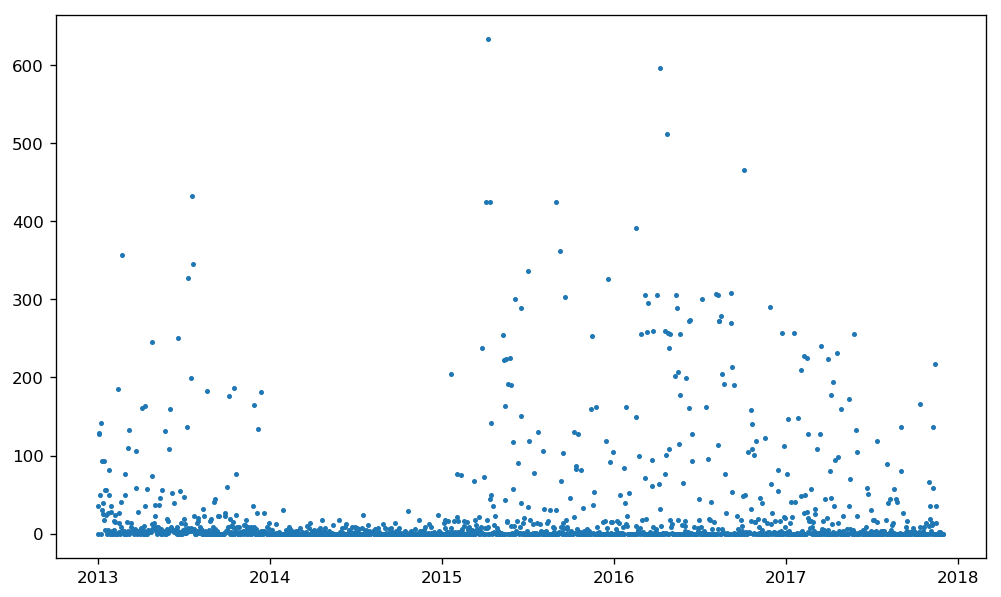

Object 1754:


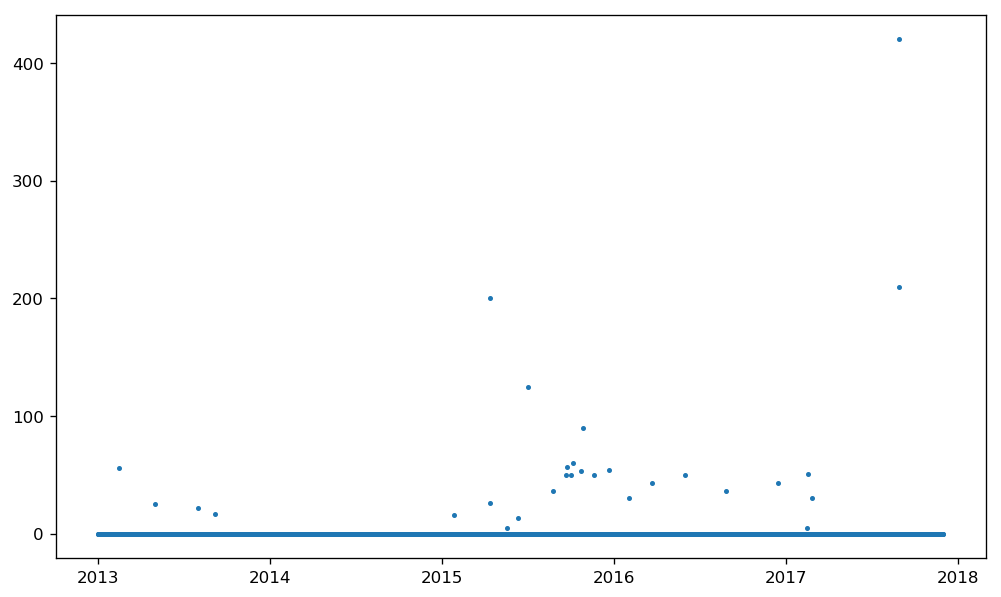

Object 1797:


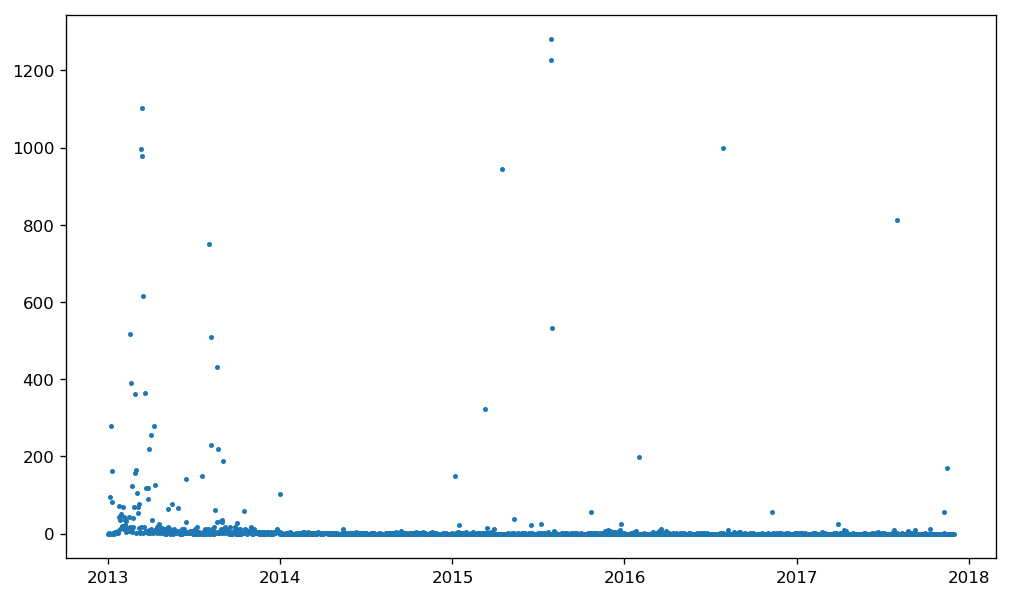

Object 1800:


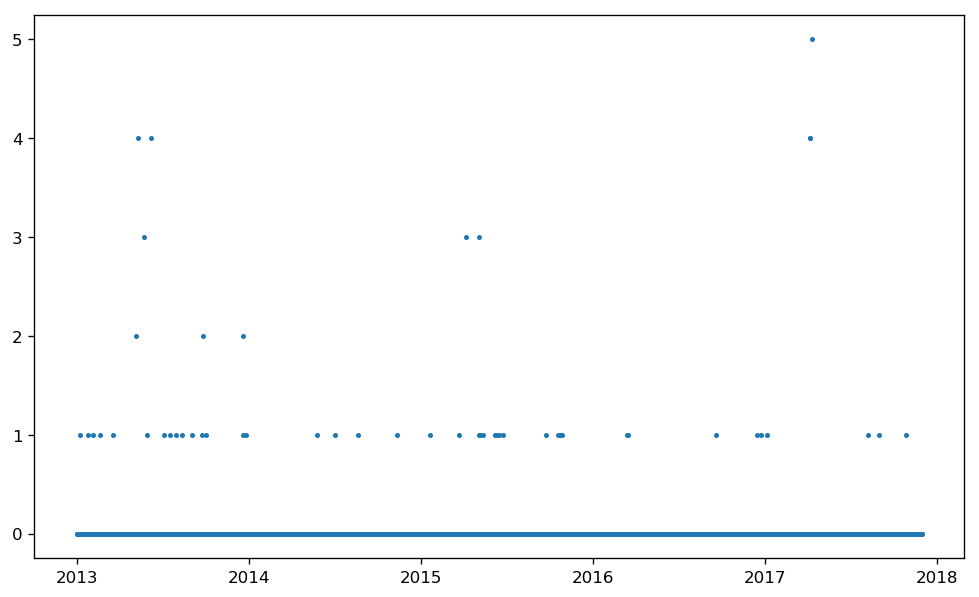

Object 1815:


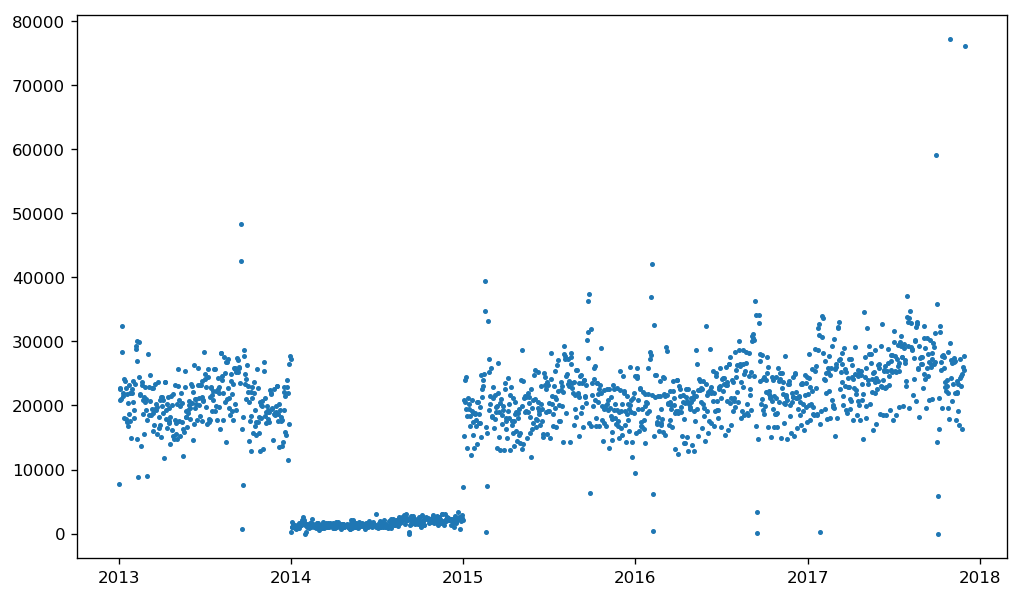

Object 1817:


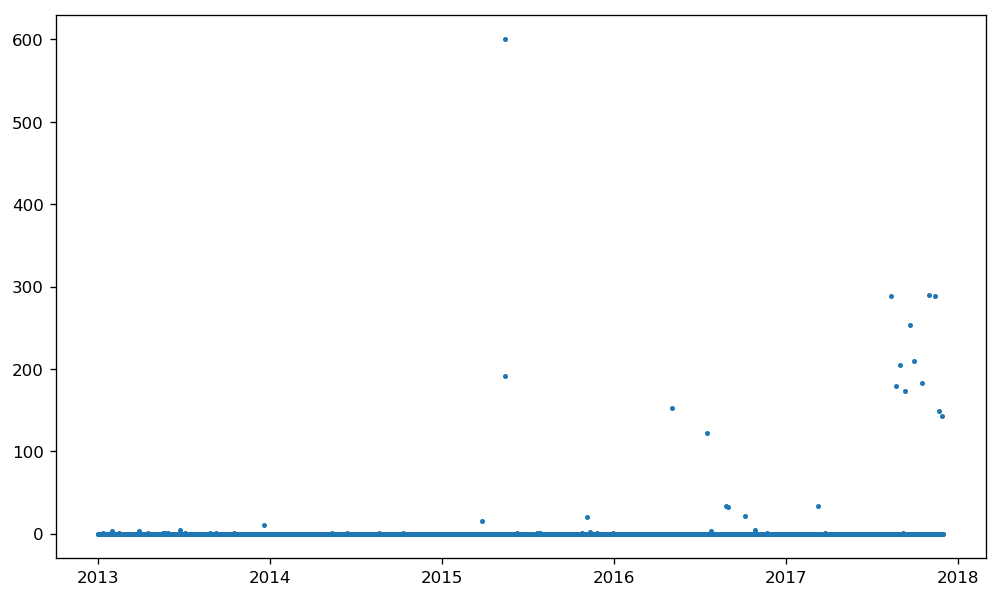

Object 1818:


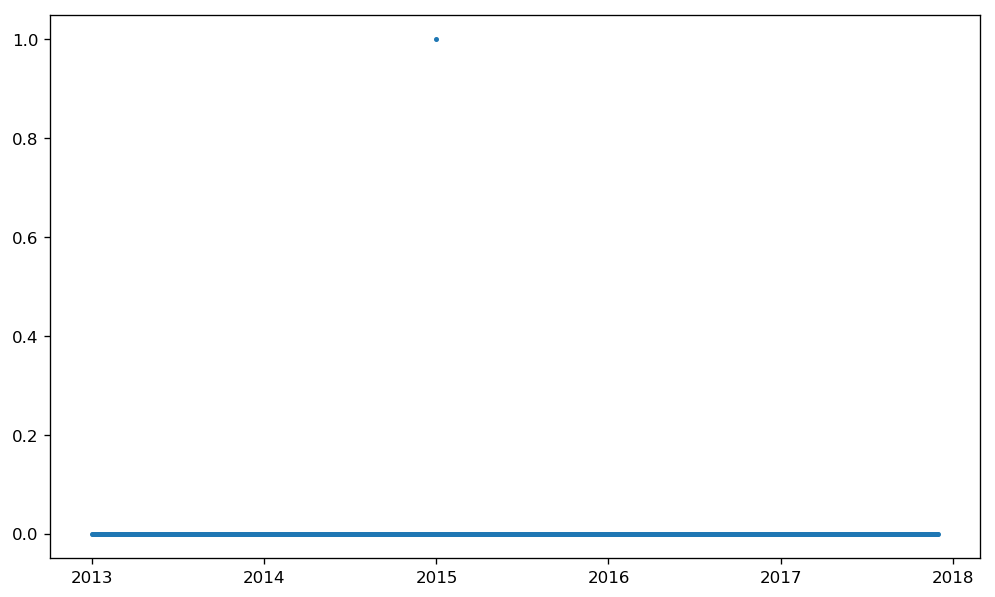

Object 1852:


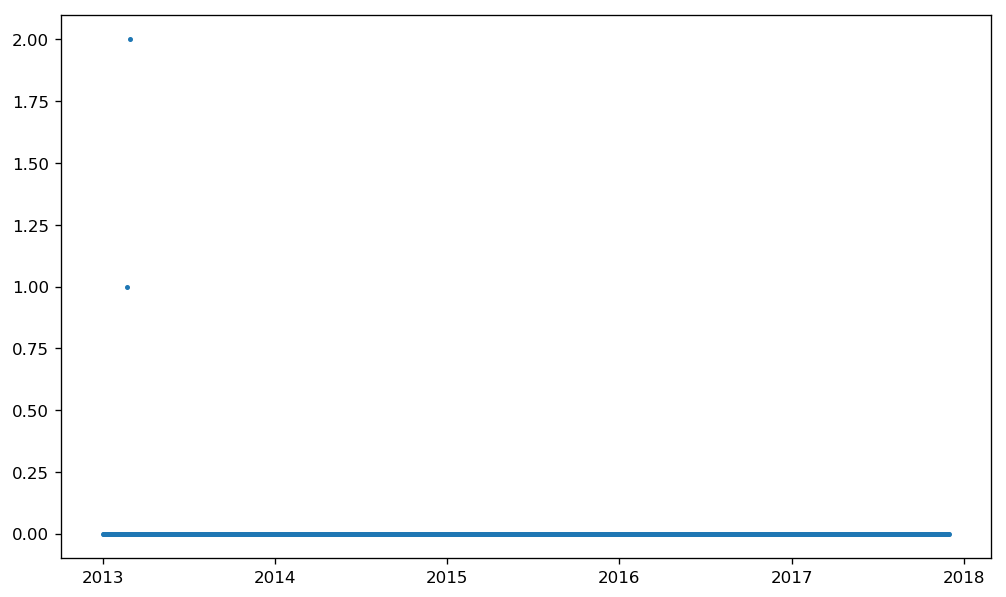

Object 1853:


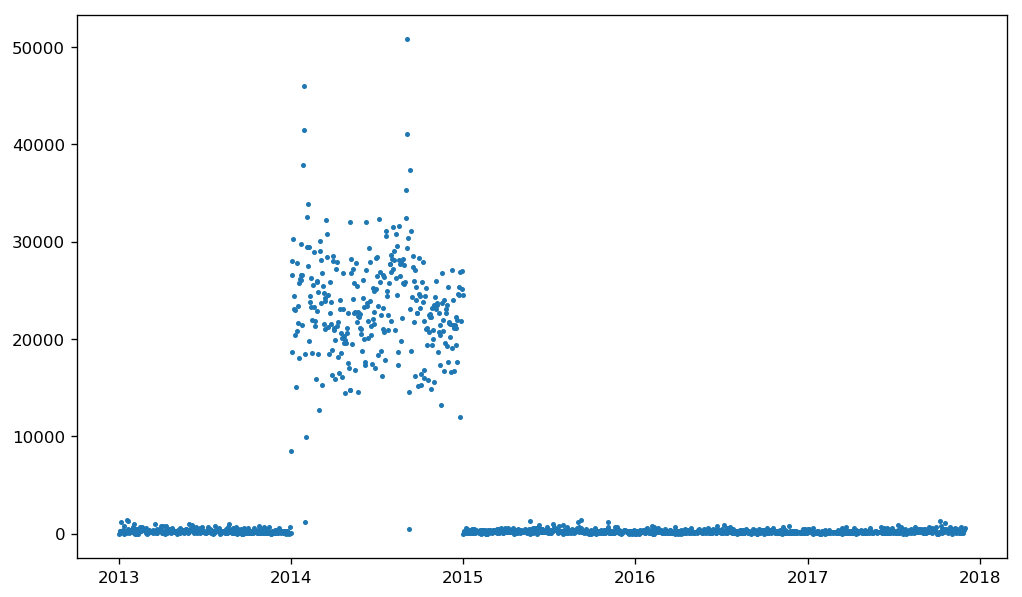

Object 1878:


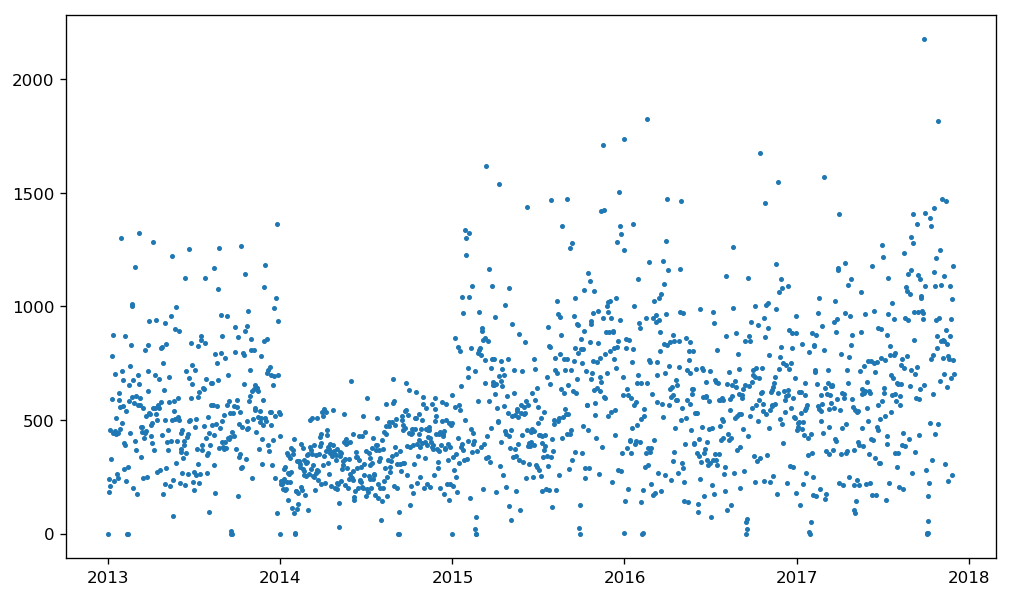

Object 1891:


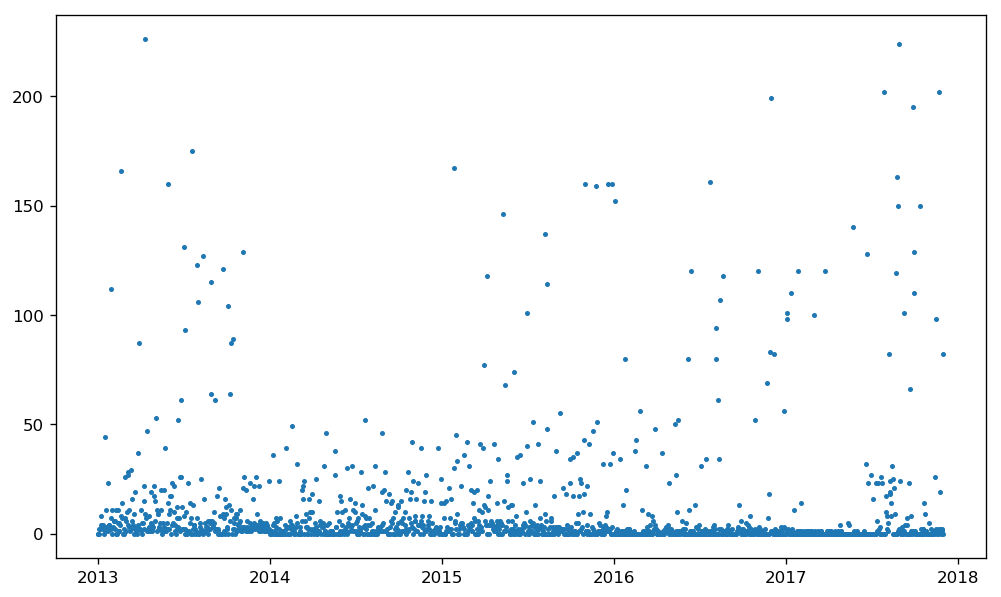

Object y_sum:


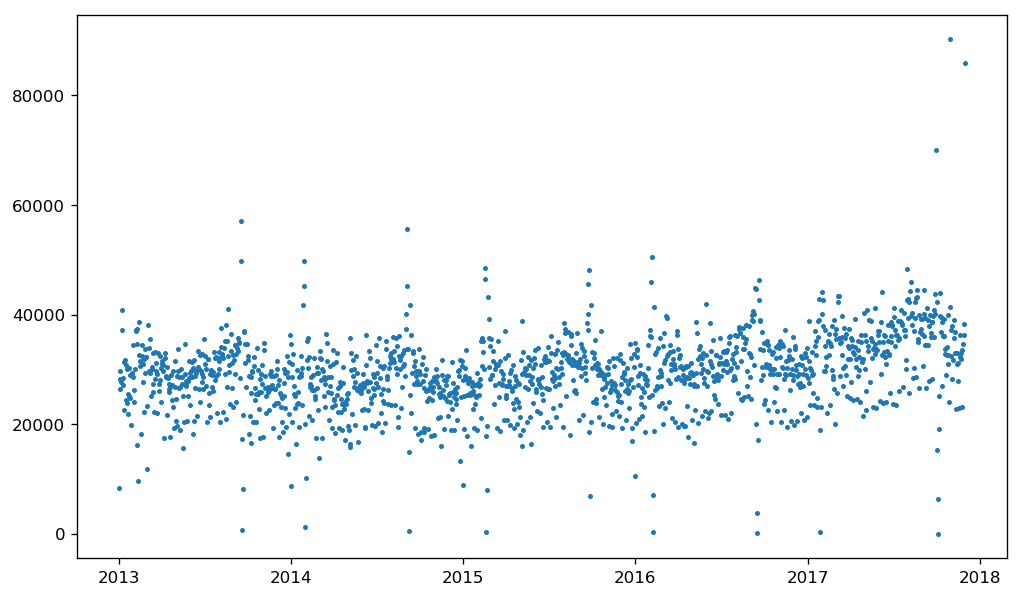

In [31]:
for obj in col_list:
    print('Object {}:'.format(obj))
    Arima_timeseries().plot(
        data_return.grabdata[data_return.grabdata['weekday']!= 6].ds,
        data_return.grabdata[data_return.grabdata['weekday']!= 6][obj])

Object 1025:


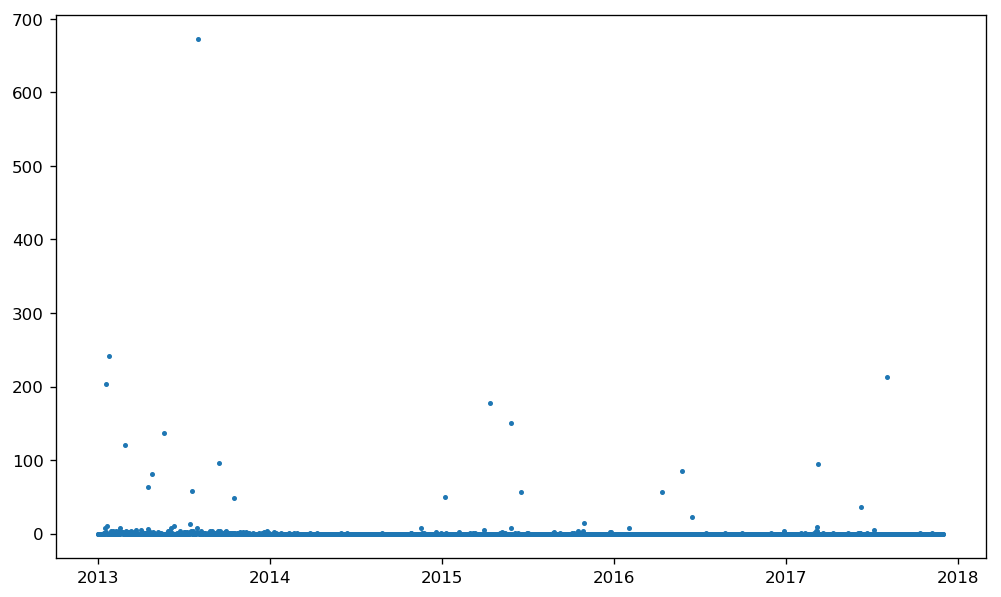

Object 1032:


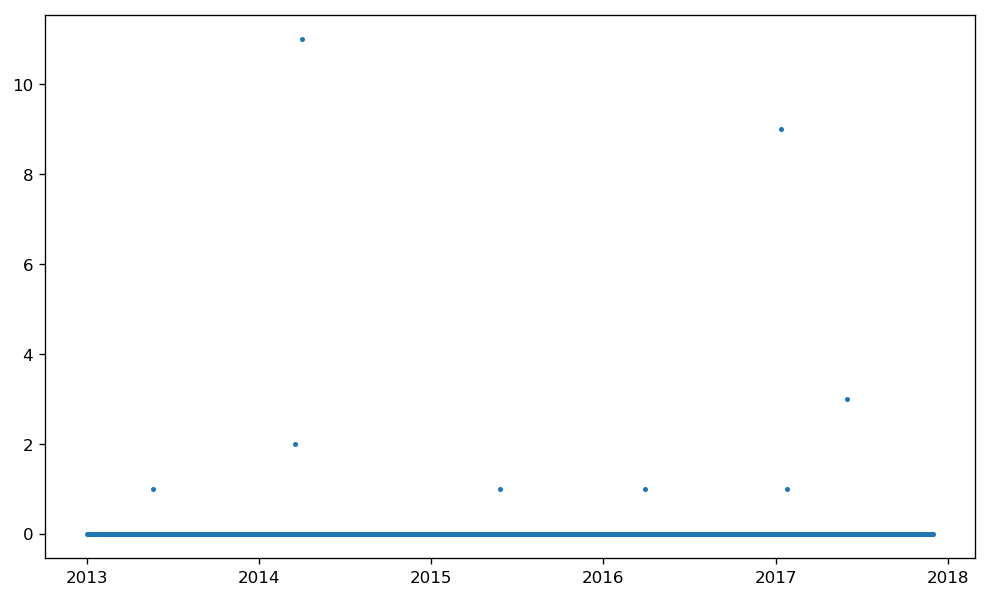

Object 1041:


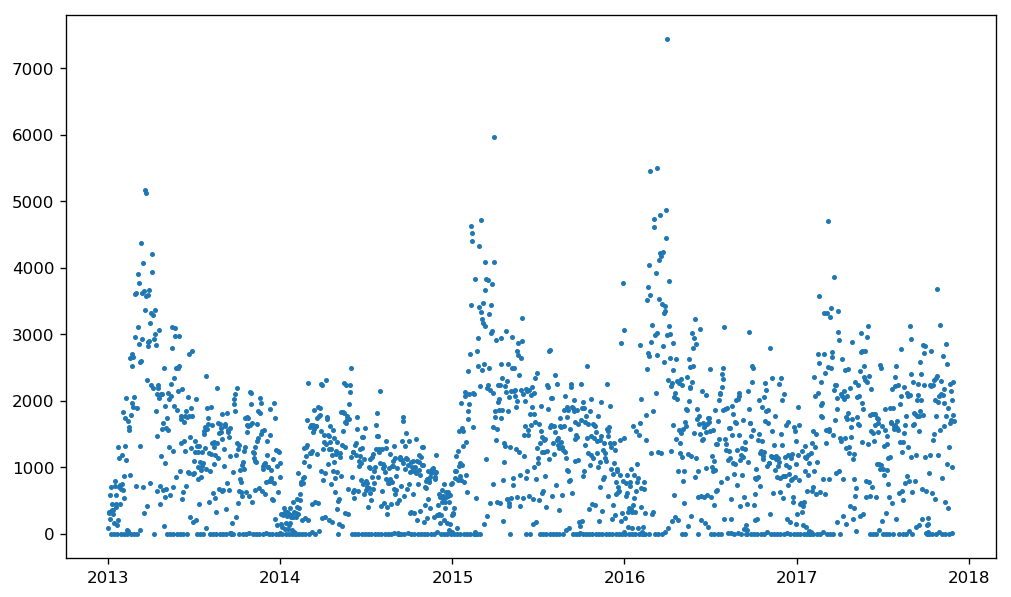

Object 1057:


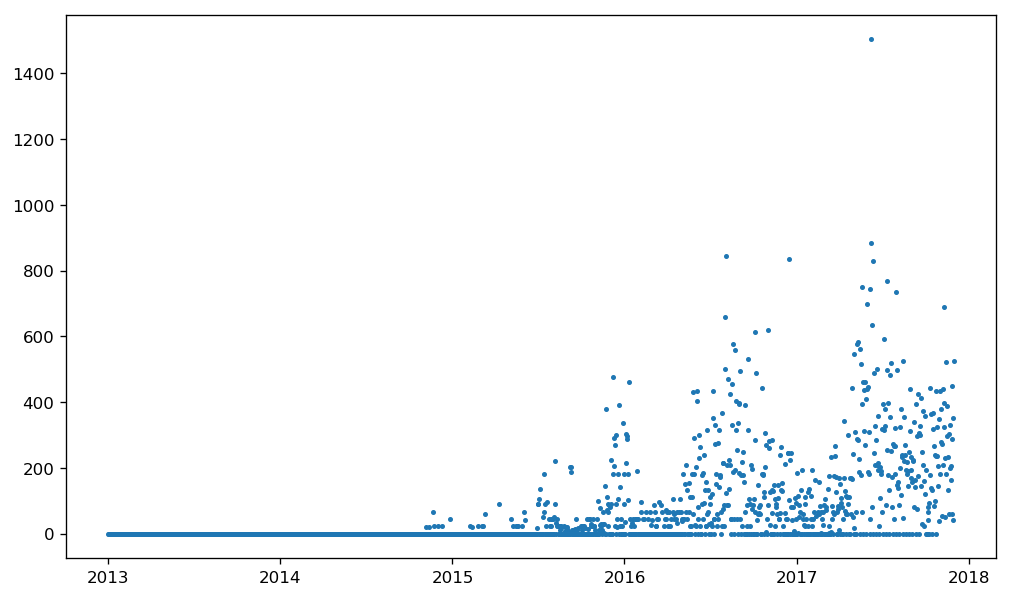

Object 1064:


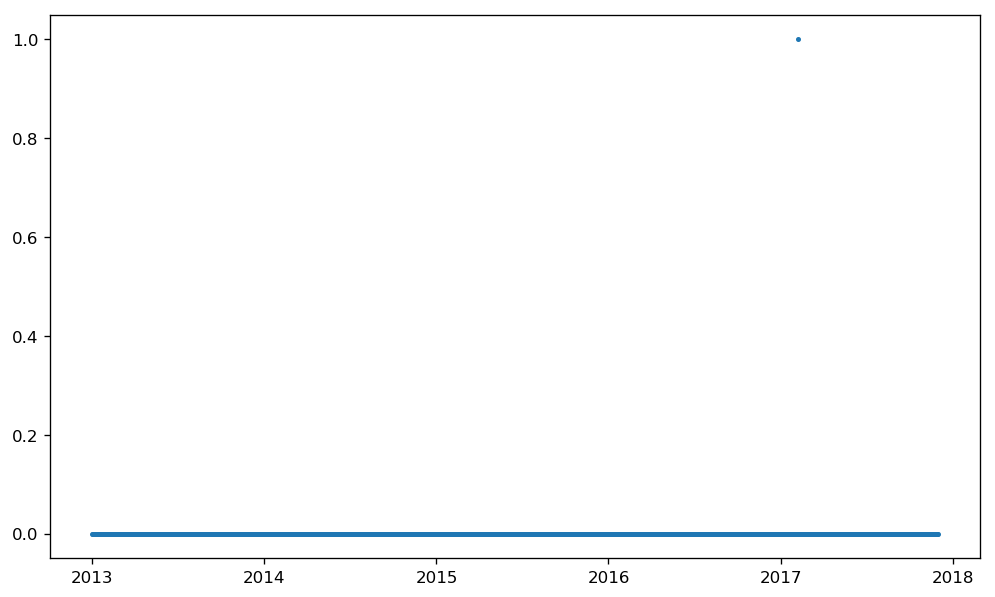

Object 1091:


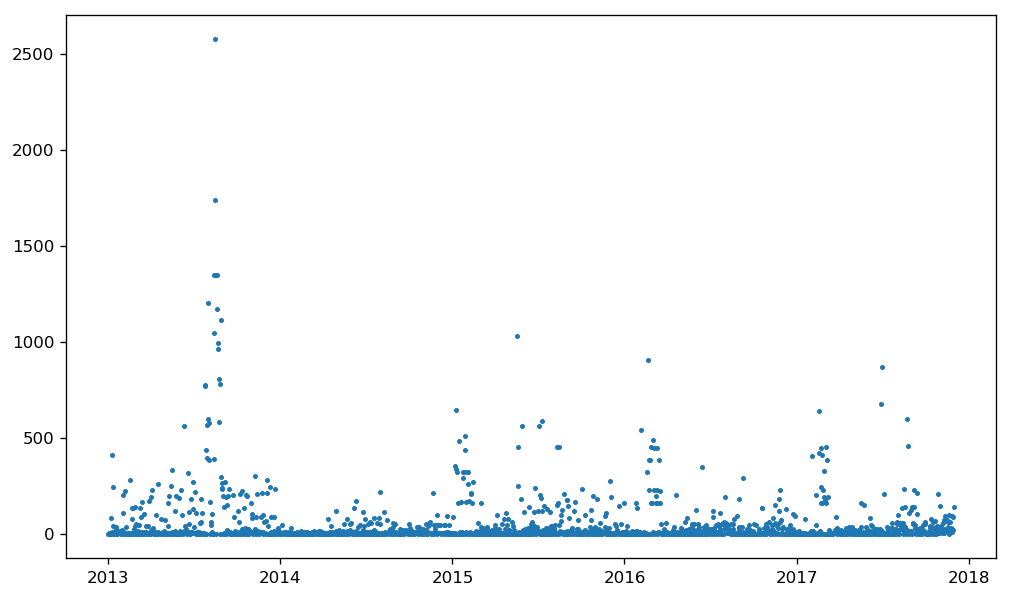

Object 1101:


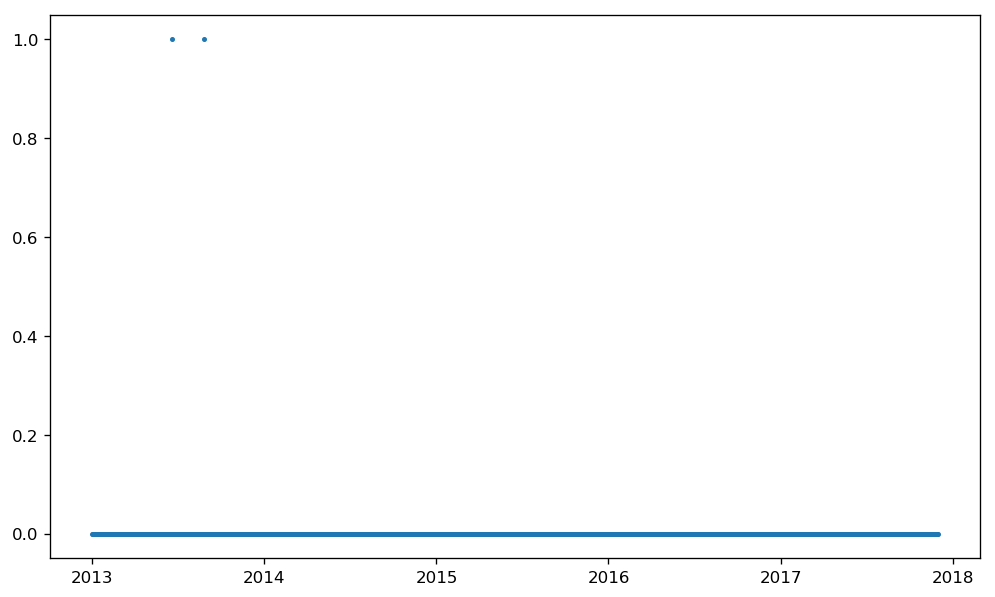

Object 1117:


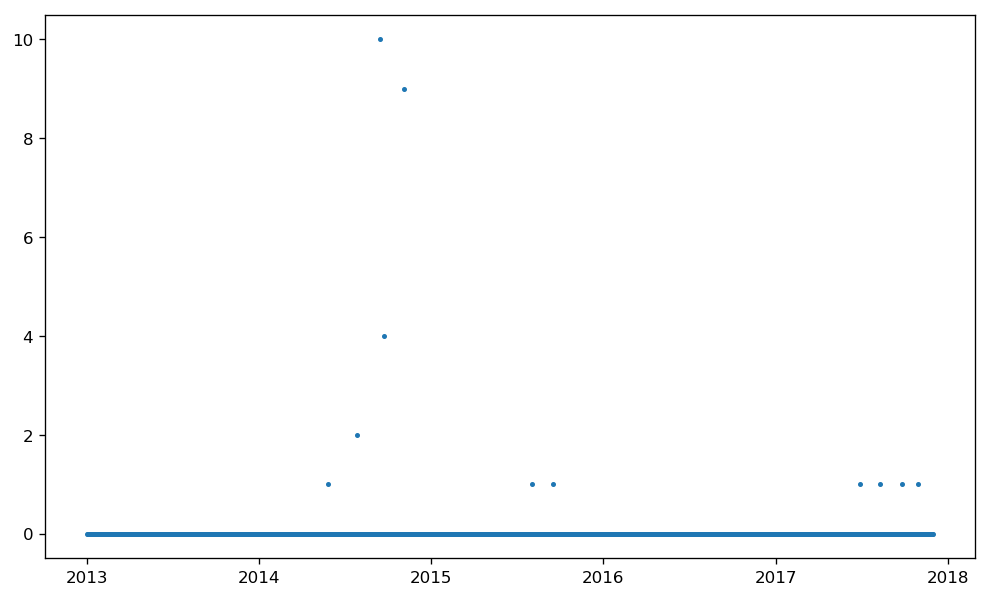

Object 1119:


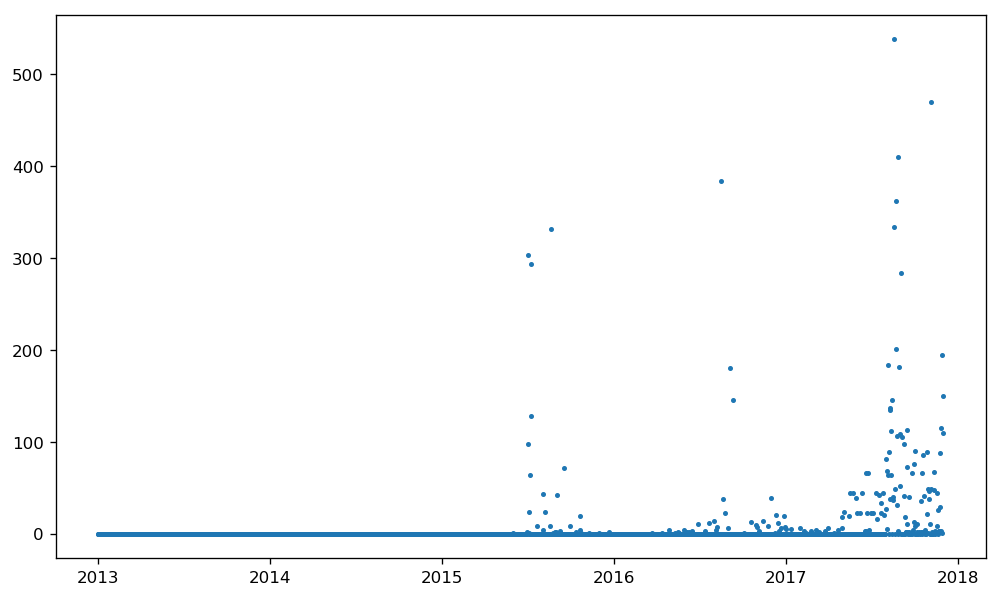

Object 1127:


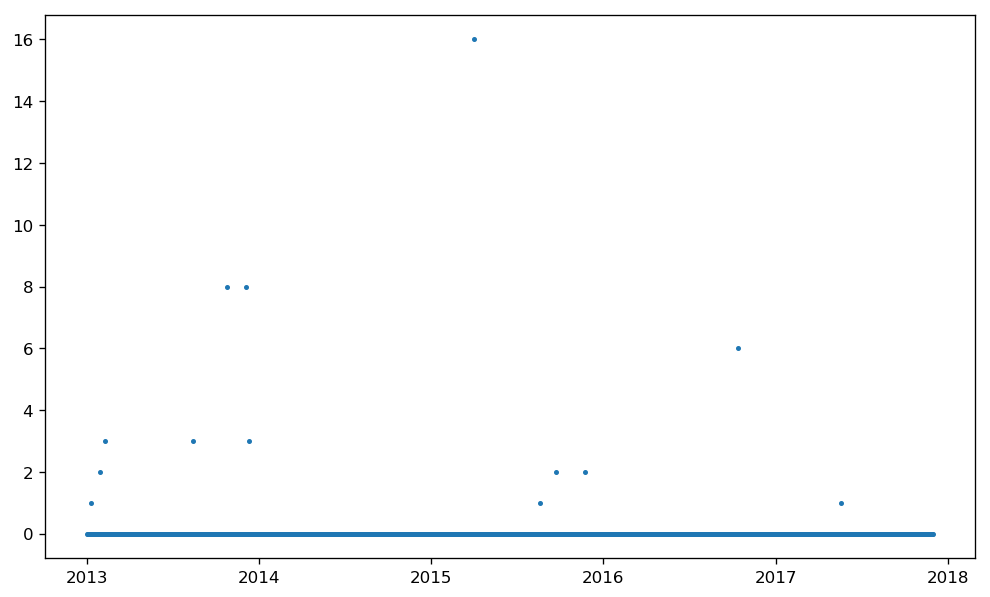

Object 1163:


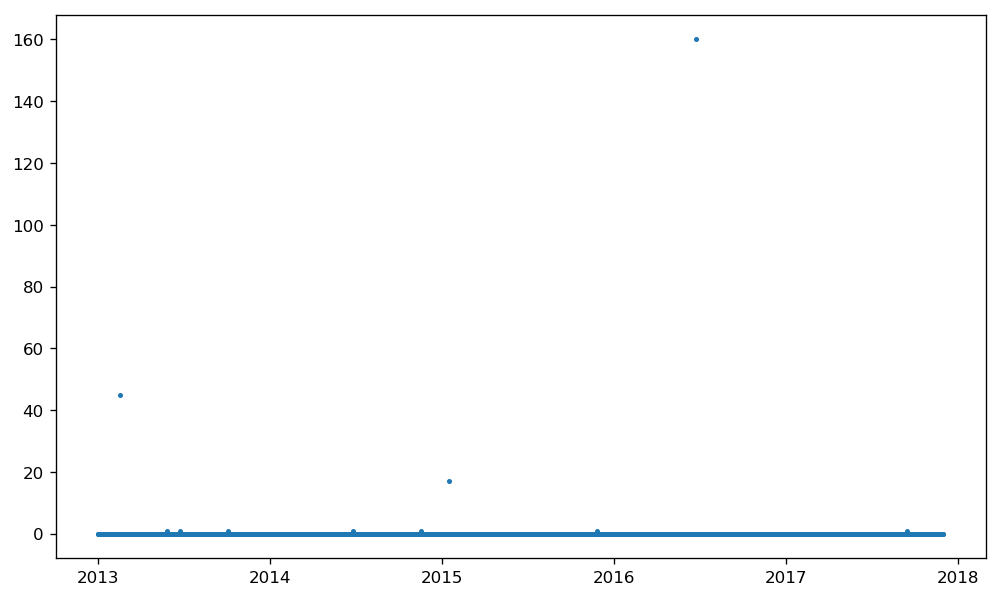

Object 1216:


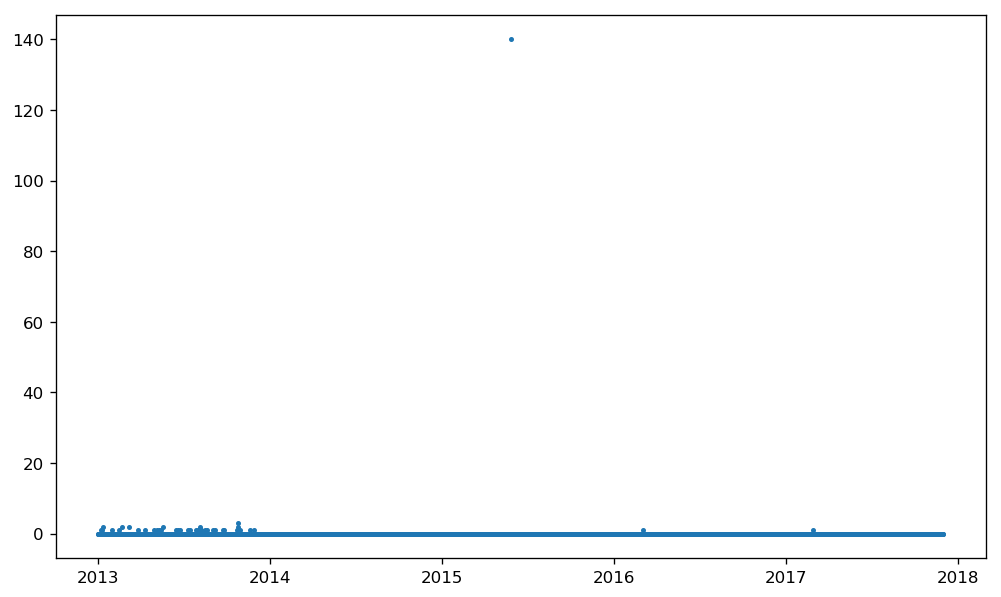

Object 1224:


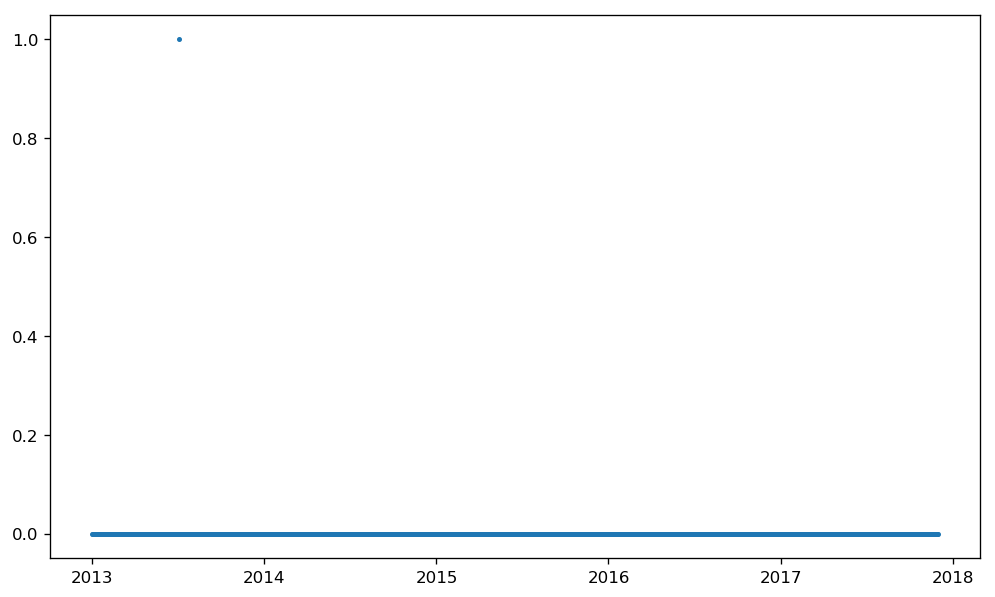

Object 1242:


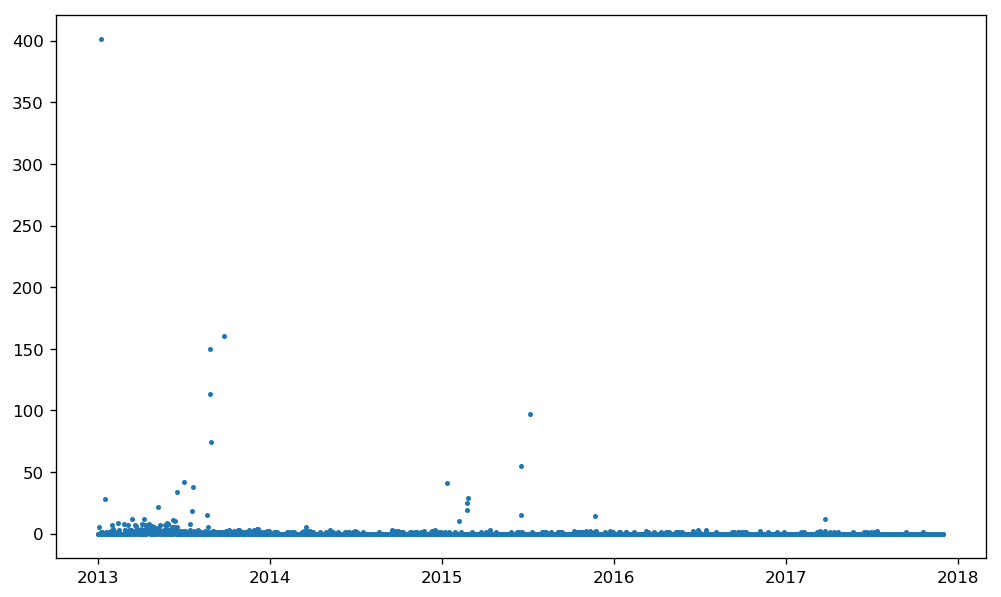

Object 1261:


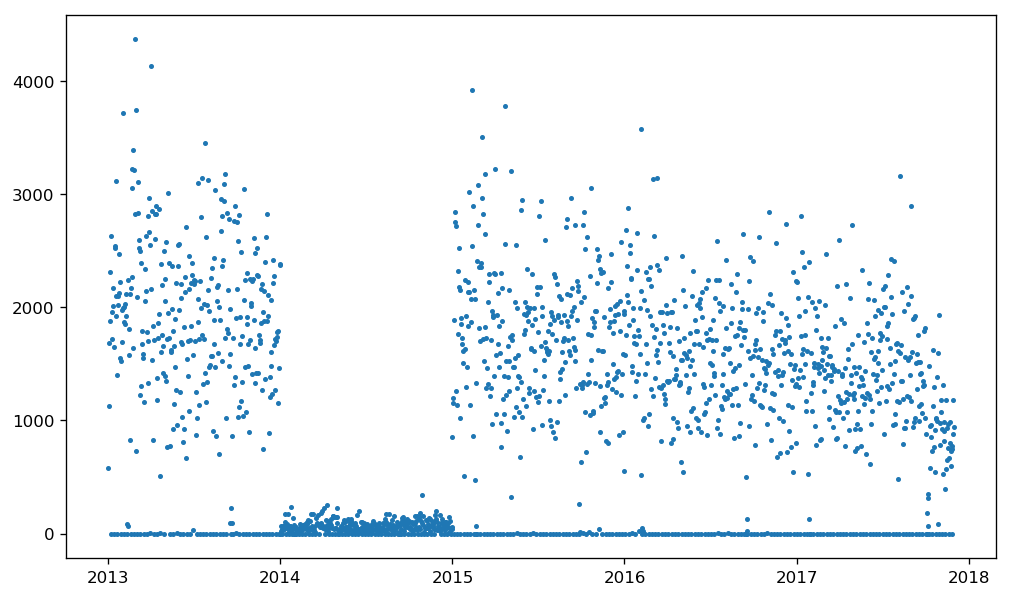

Object 1298:


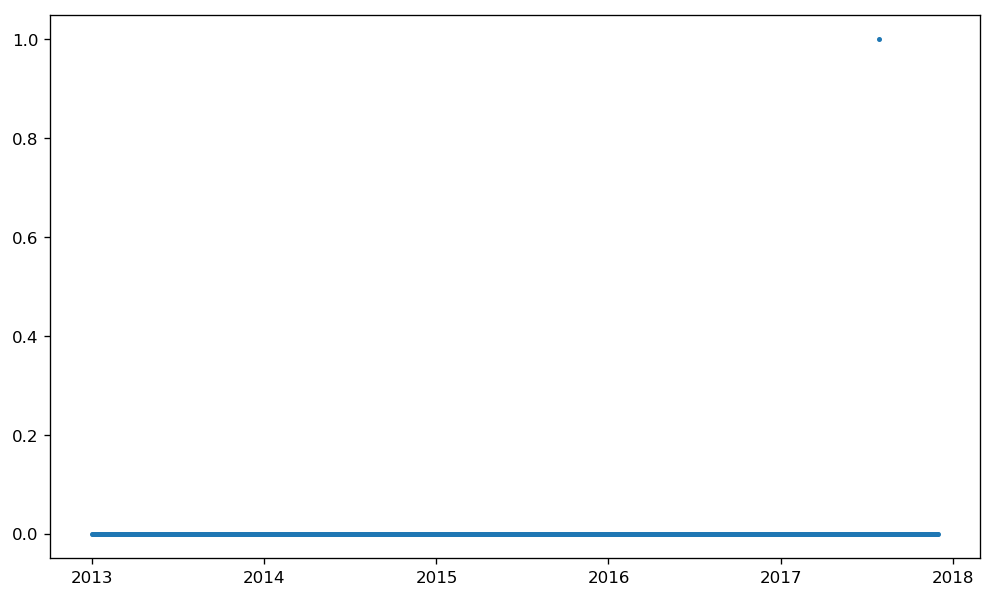

Object 1355:


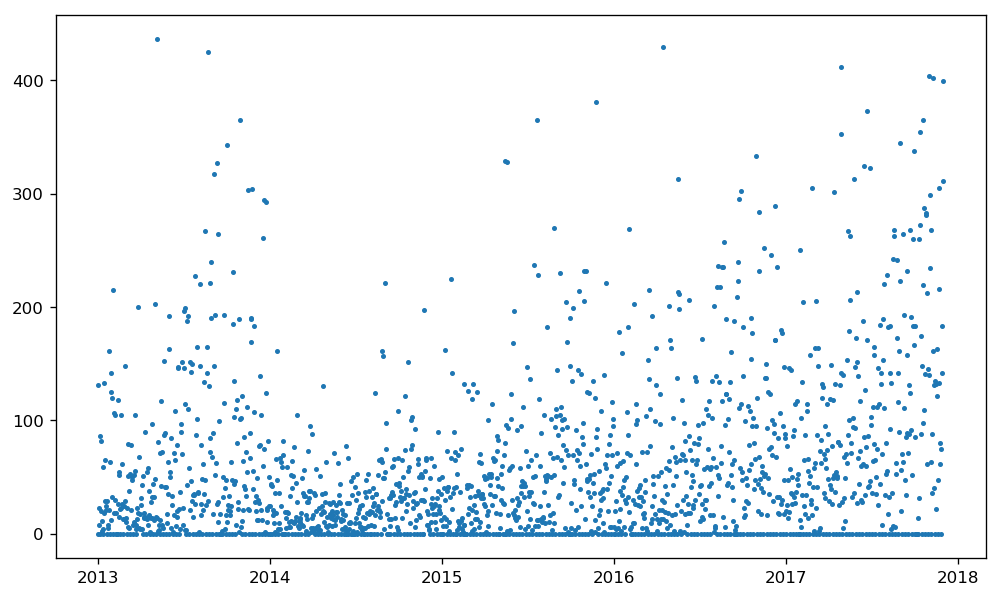

Object 1373:


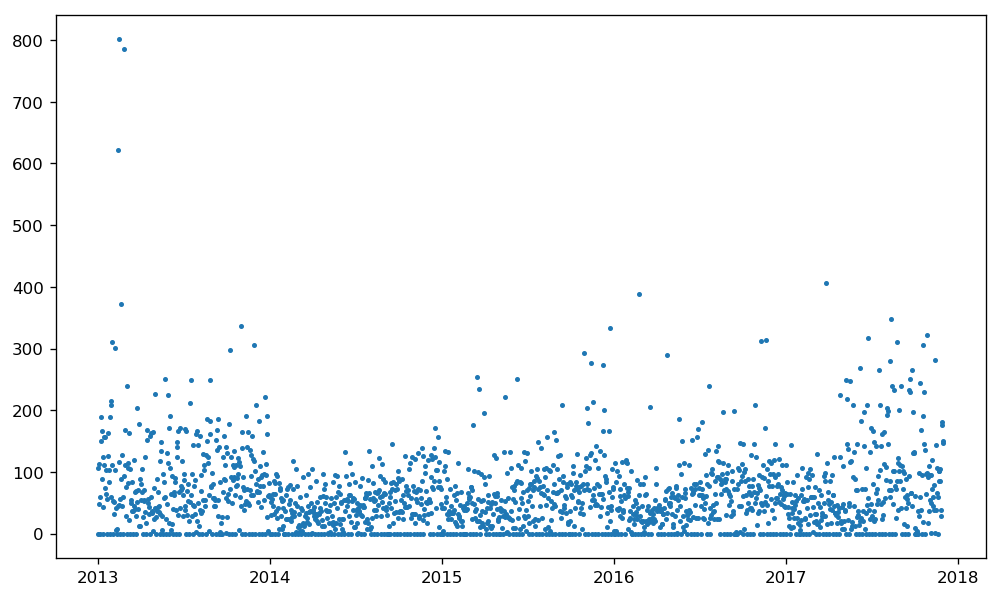

Object 1375:


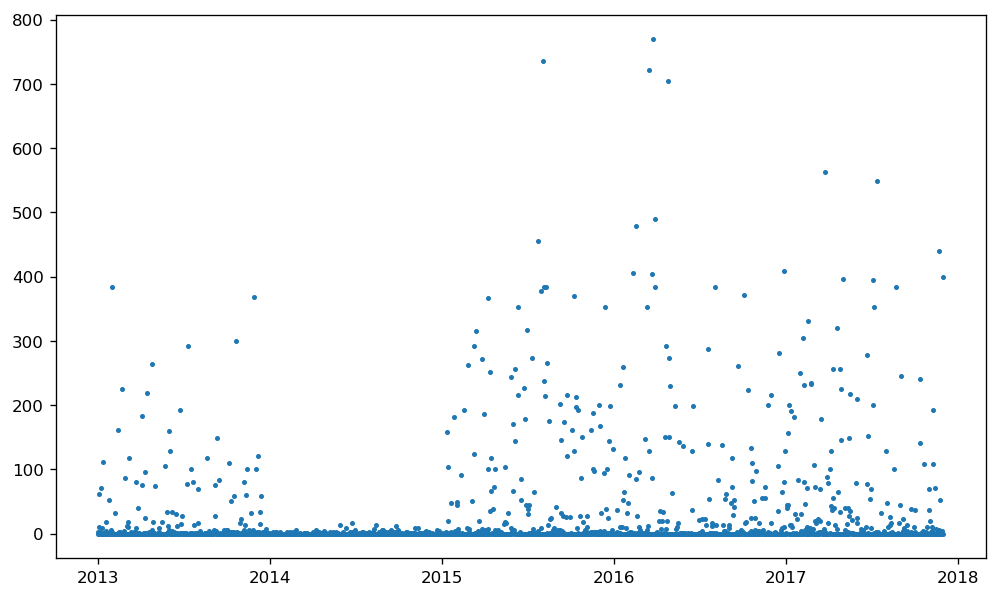

Object 1376:


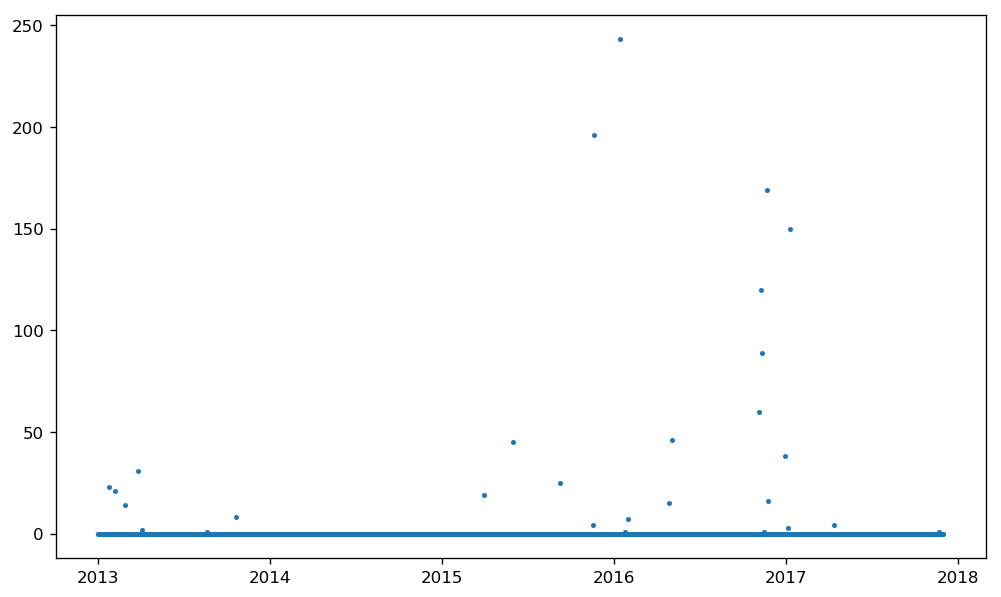

Object 1396:


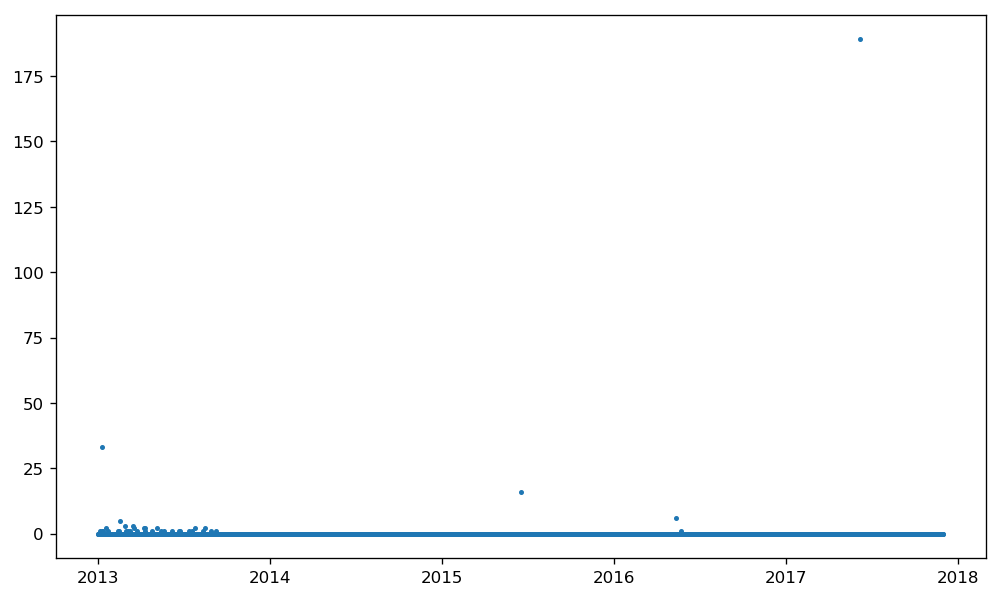

Object 1466:


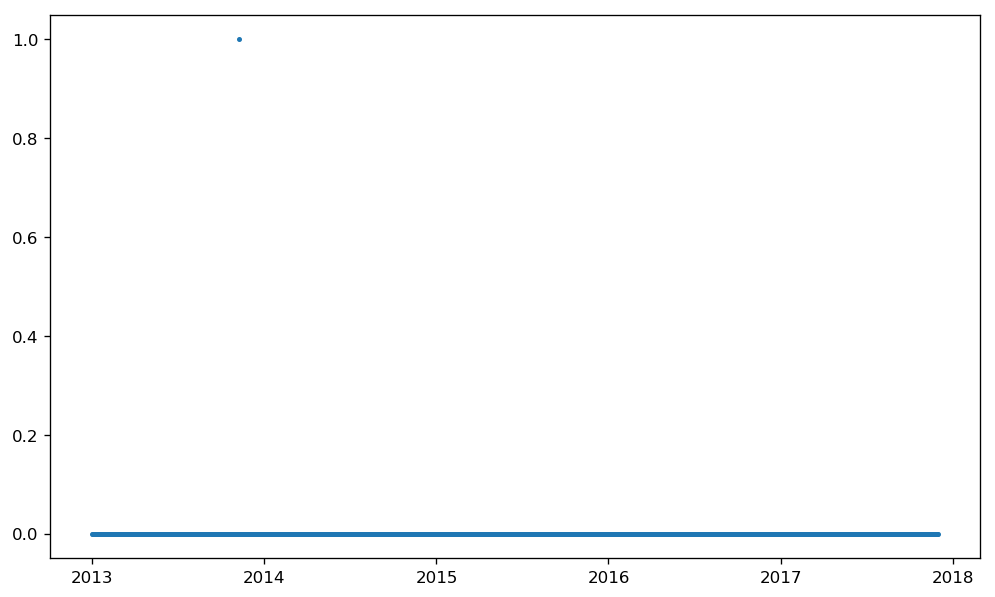

Object 1627:


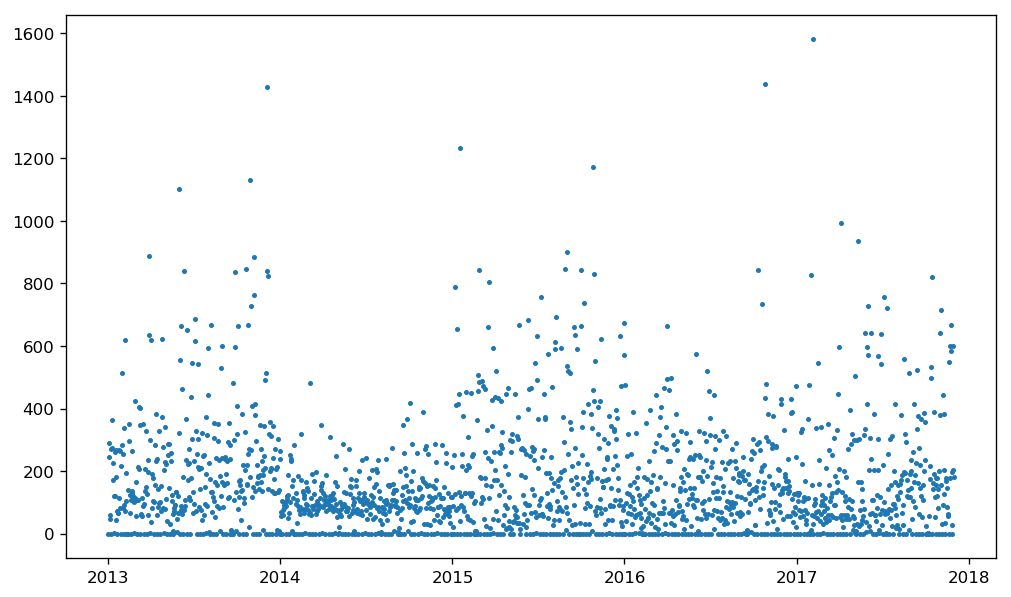

Object 1652:


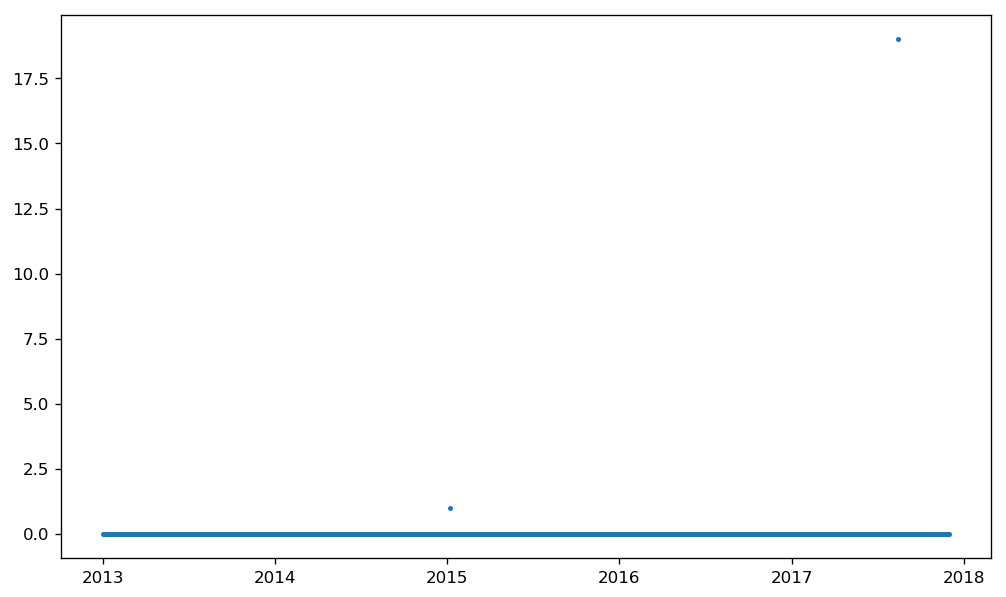

Object 1656:


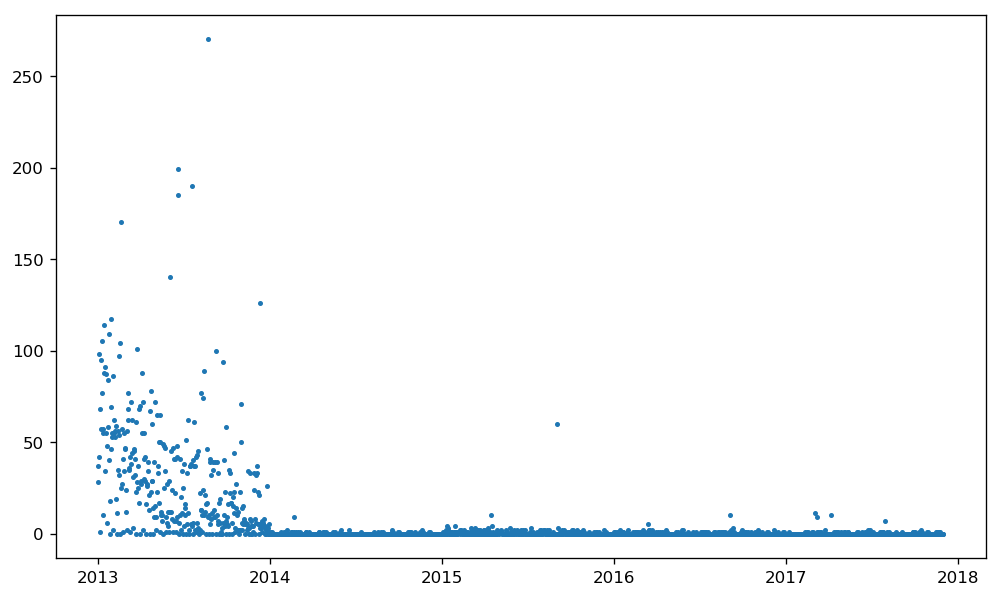

Object 1692:


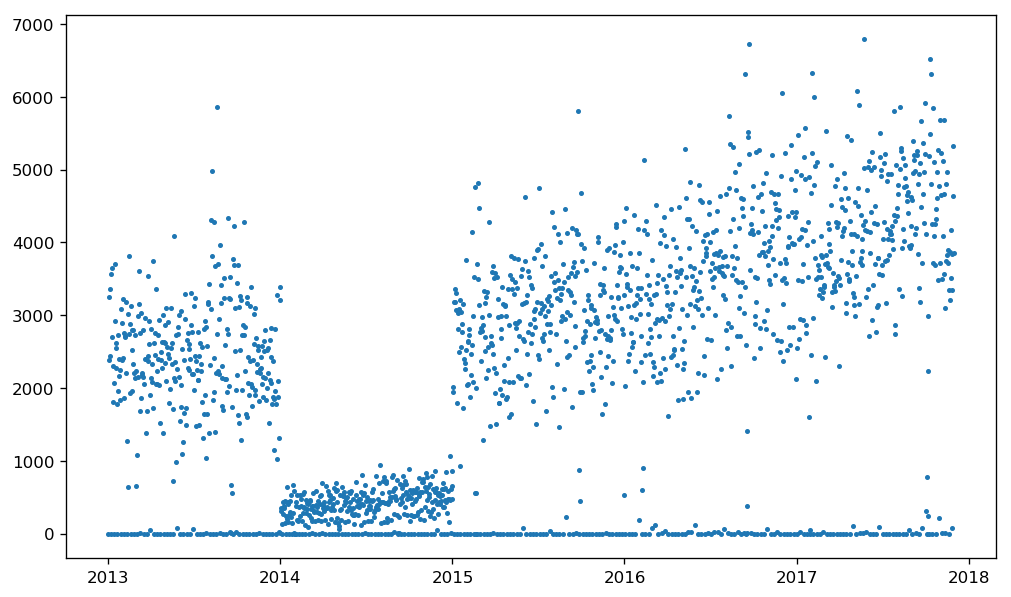

Object 1729:


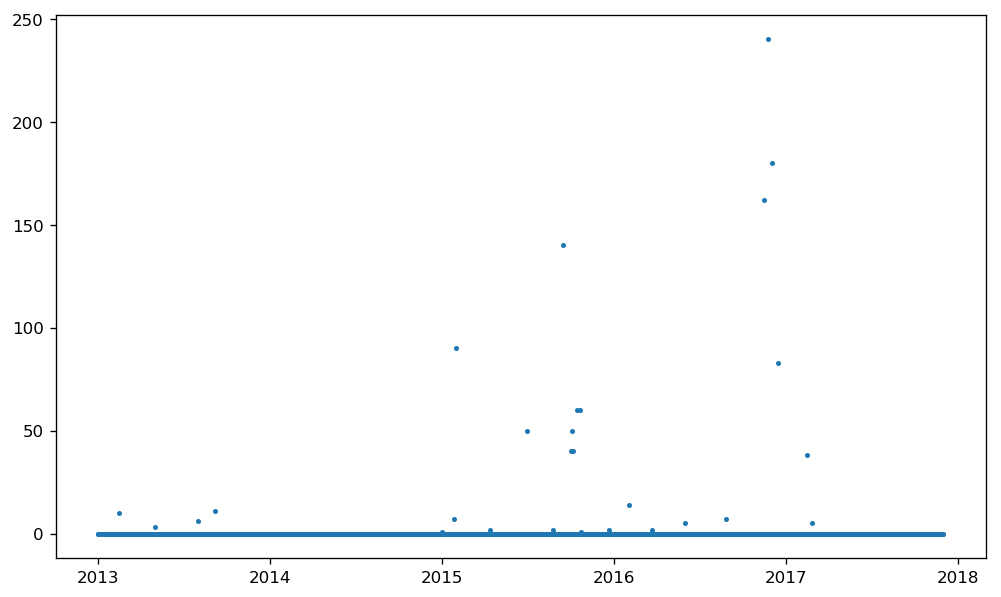

Object 1745:


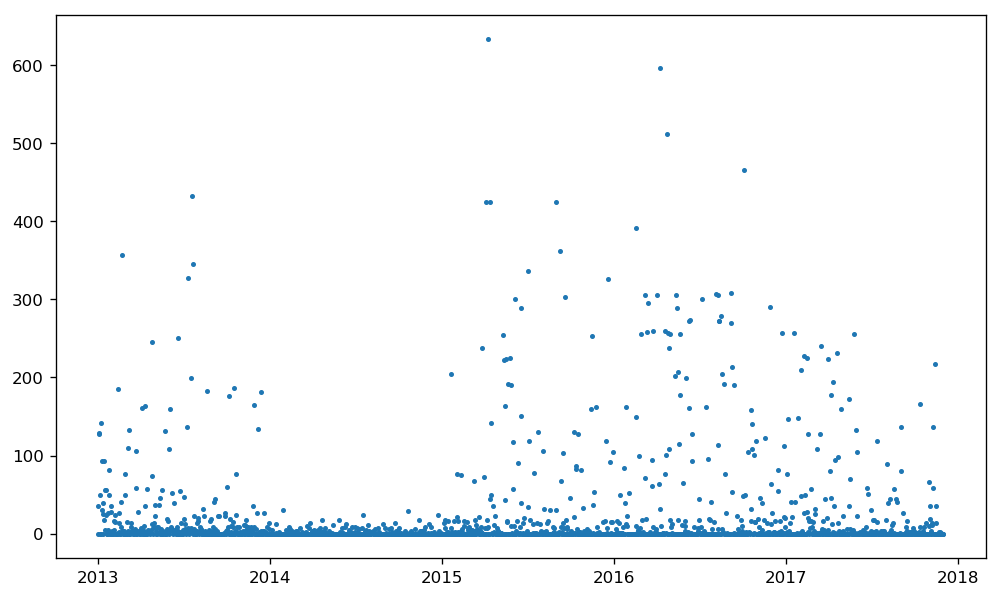

Object 1754:


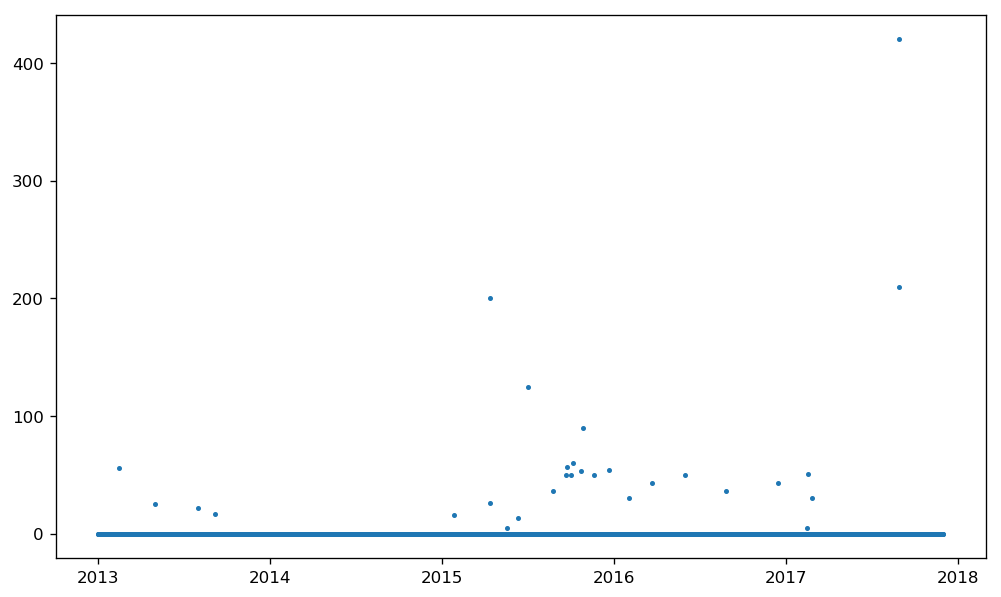

Object 1797:


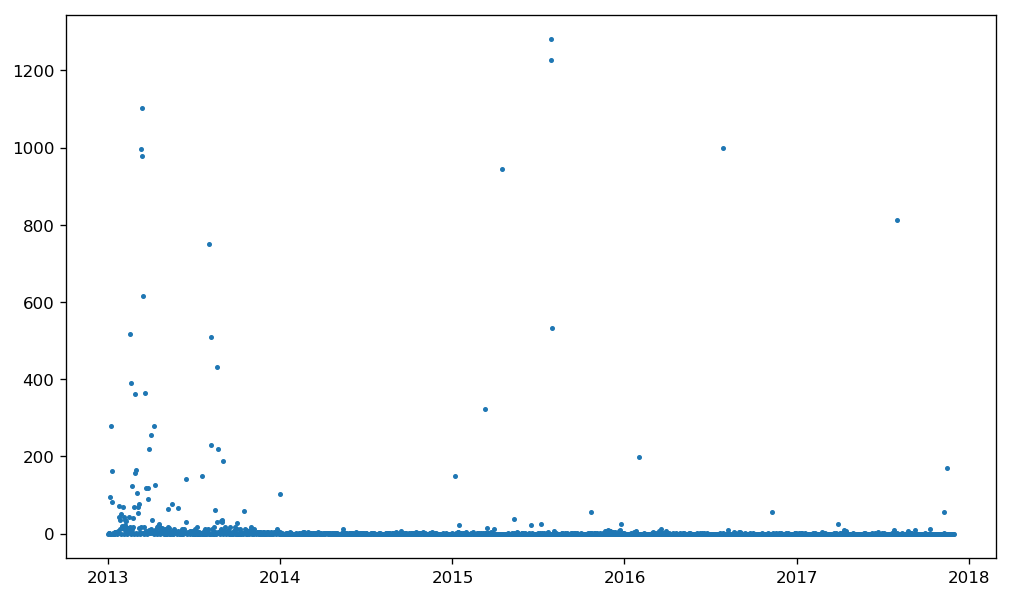

Object 1800:


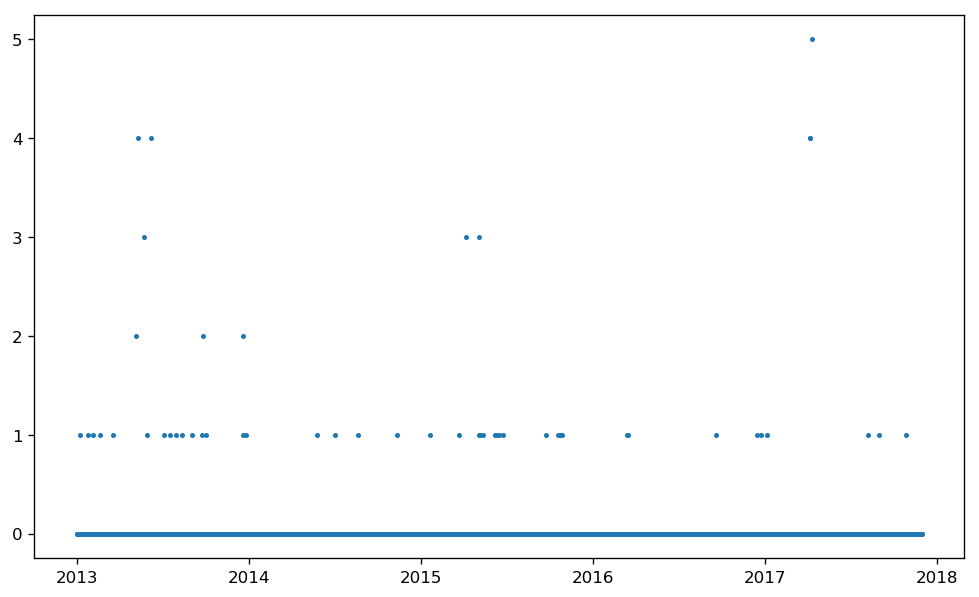

Object 1815:


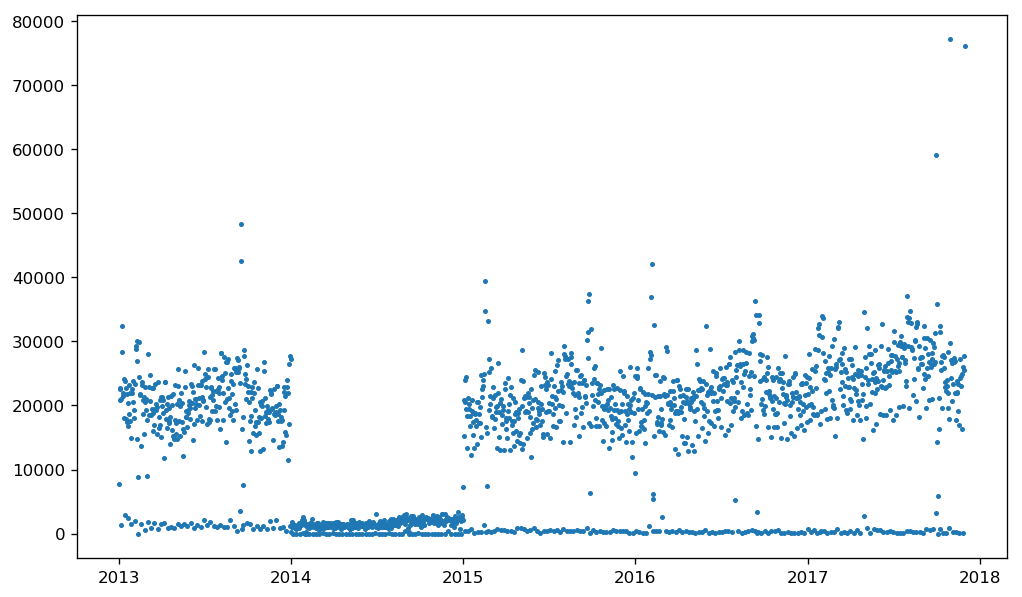

Object 1817:


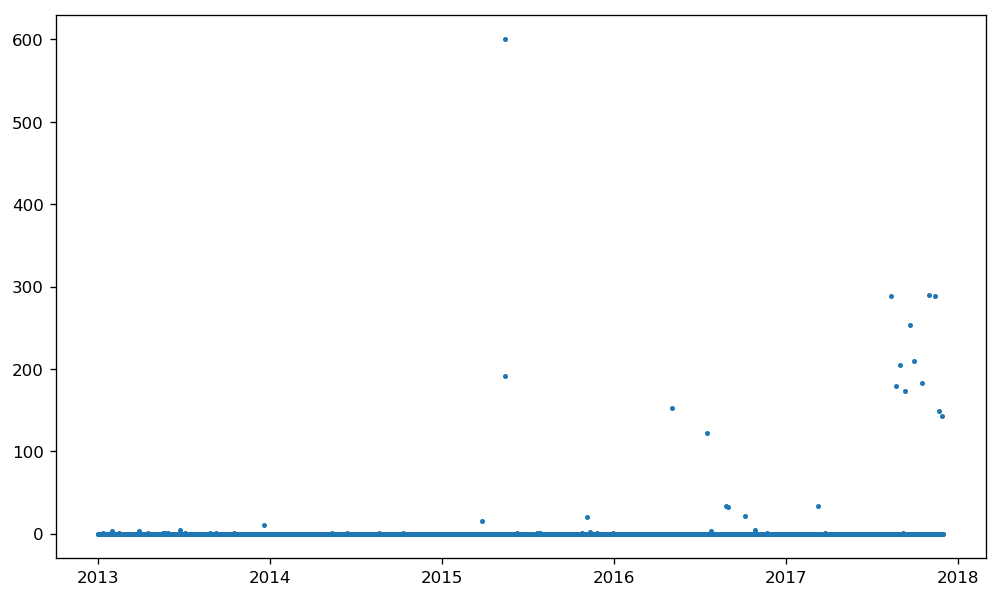

Object 1818:


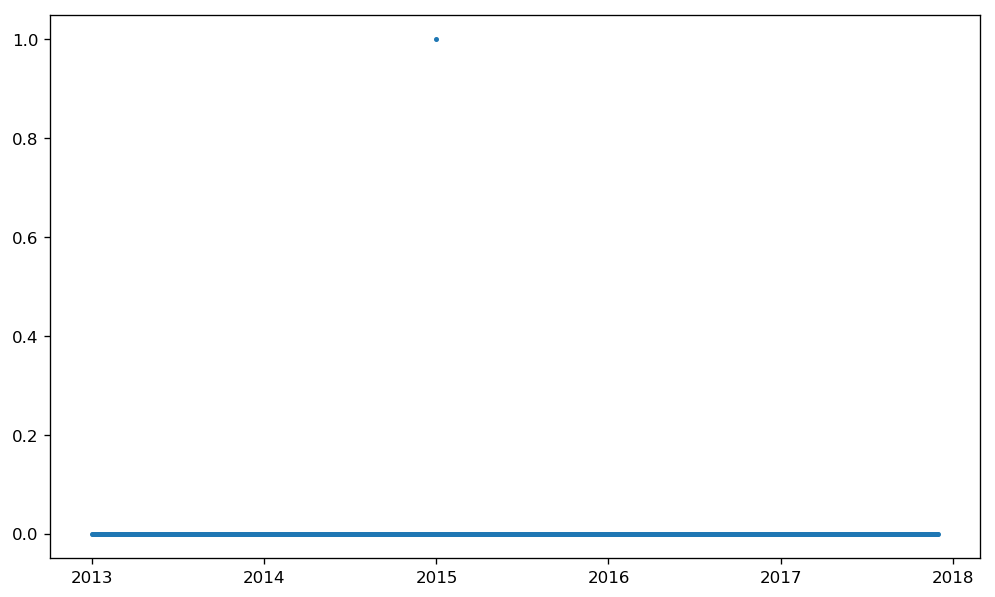

Object 1852:


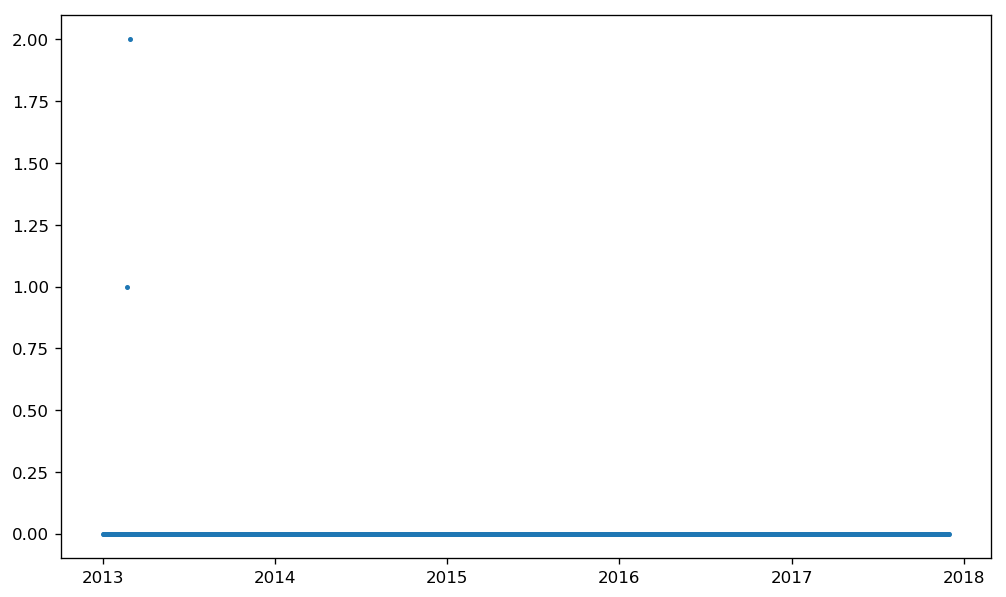

Object 1853:


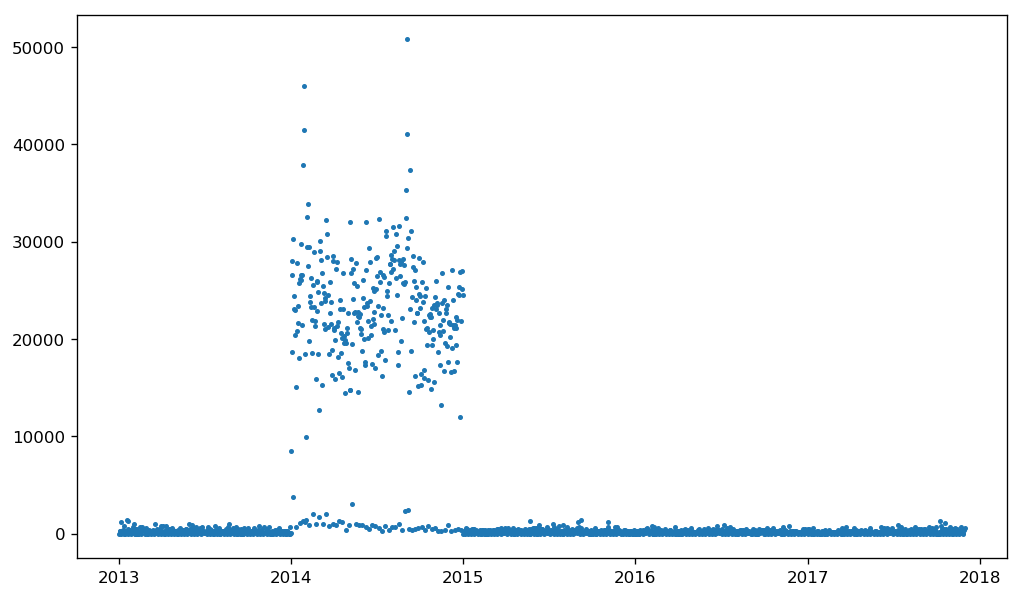

Object 1878:


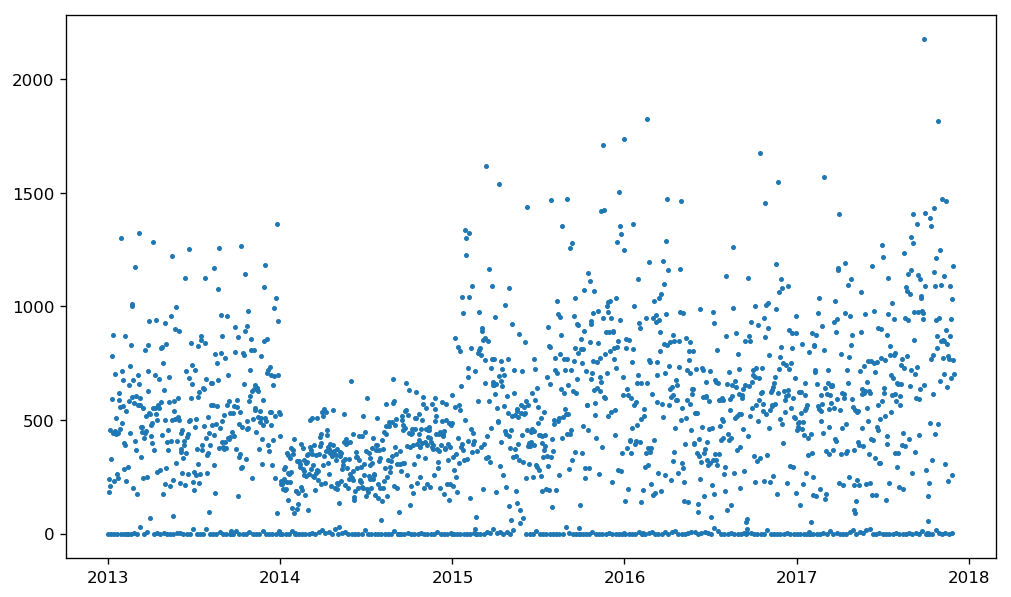

Object 1891:


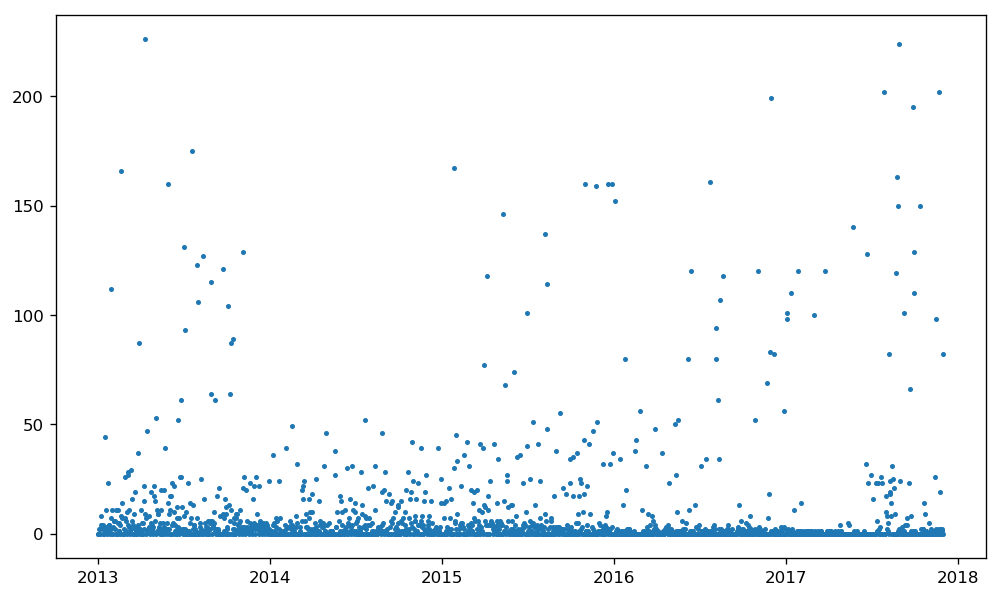

Object y_sum:


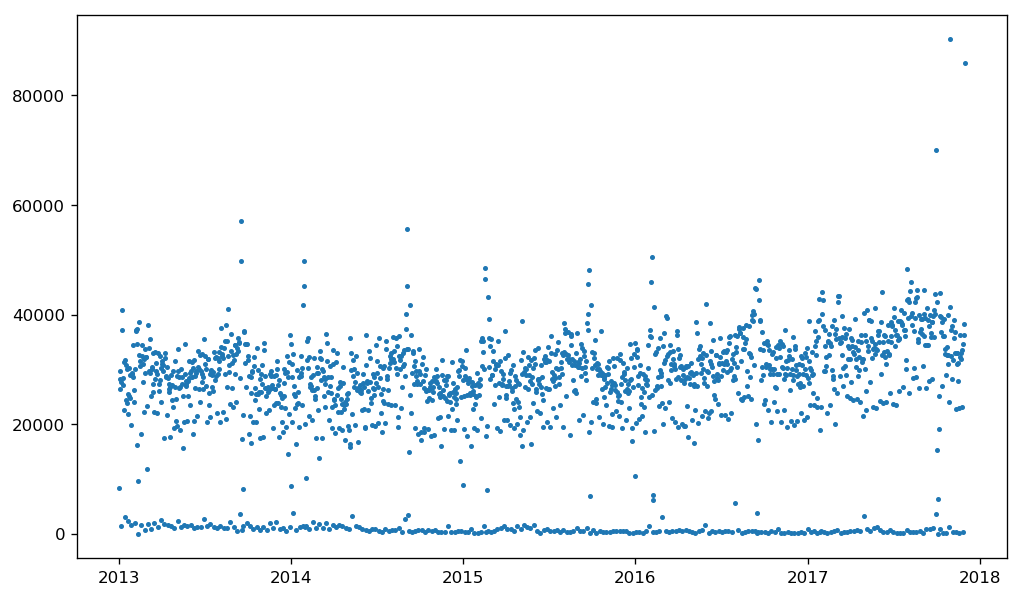

In [35]:
for obj in col_list:
    print('Object {}:'.format(obj))
    Arima_timeseries().plot(
        data_return.grabdata.ds,
        data_return.grabdata[obj])

* 데이터의 주기성을 파악합니다.

lag 0: corr 1.0
lag 330: corr 0.45052077361898696
lag 12: corr 0.4207466152753902
lag 114: corr 0.40765811573874333
lag 6: corr 0.40491013125565306
lag 18: corr 0.40236850104307287
lag 42: corr 0.38453716777506664
lag 36: corr 0.3836193771031799
lag 60: corr 0.3784636194908784
lag 150: corr 0.37788101483257047
lag 156: corr 0.37609277486528114
lag 30: corr 0.3739578702360935
lag 54: corr 0.3726658709715595
lag 72: corr 0.36909719274661223
lag 132: corr 0.3667285375315366
lag 312: corr 0.3649708893155868
lag 162: corr 0.3649583613016953
lag 24: corr 0.36427977726692906
lag 90: corr 0.3614696745538959
lag 144: corr 0.360810914522925
lag 1: corr 0.3602571286215464
lag 168: corr 0.3579571918483246
lag 138: corr 0.354116103827676
lag 318: corr 0.35161408409173883
lag 78: corr 0.34838030600204484
lag 102: corr 0.34712034236863
lag 66: corr 0.34550955213191903
lag 288: corr 0.3453263910666306
lag 126: corr 0.3432062085195229
lag 294: corr 0.33980665061928617
lag 48: corr 0.33931738797247885
l

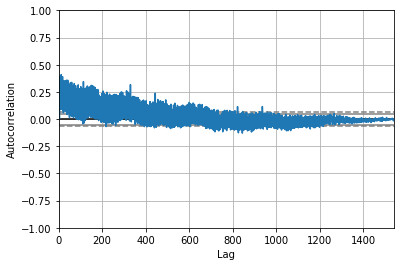

In [37]:
Arima_timeseries().corr_check(data_return.grabdata[data_return.grabdata['weekday']!= 6].y_sum)

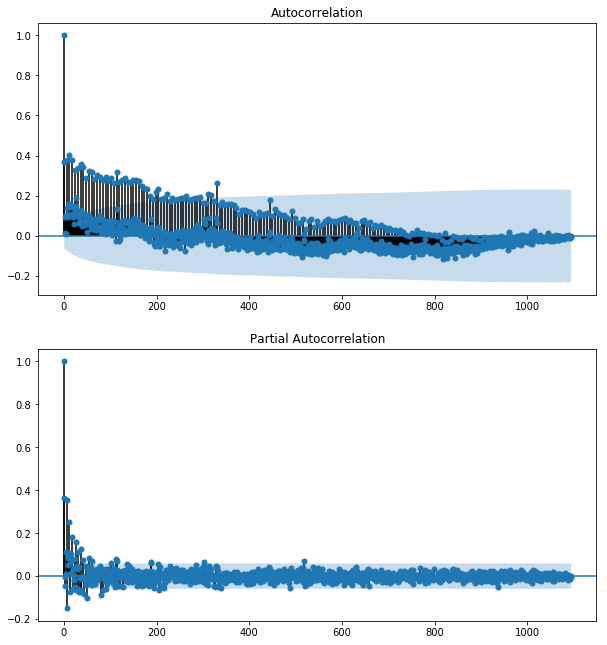

In [47]:
Arima_timeseries().acf_plot(data_return.grabdata[data_return.grabdata['weekday']!= 6].y_sum)

In [38]:
arima= Arima_timeseries()

* 데이터를 1주일 주기로 차분했을 때의 주기성을 파악합니다.

In [40]:
df_ysum_diff6= arima.diff(data_return.grabdata[data_return.grabdata['weekday']!= 6].y_sum, 6, '6day')

lag 0: corr 1.0
lag 1: corr 0.40295852889138356
lag 189: corr 0.26679021146784365
lag 304: corr 0.2342761449752363
lag 330: corr 0.23184085646168923
lag 329: corr 0.20091740717795376
lag 313: corr 0.19308663146514748
lag 303: corr 0.18480247032195682
lag 115: corr 0.16257314053396293
lag 190: corr 0.15009589593562914
lag 188: corr 0.1408655164722044
lag 331: corr 0.13490929185733952
lag 114: corr 0.1282799938038665
lag 26: corr 0.1260600243105177
lag 305: corr 0.118202810046441
lag 328: corr 0.1000153871985621
lag 116: corr 0.08775150163417383
lag 357: corr 0.08378682713449133
lag 312: corr 0.0767092593935426
lag 256: corr 0.07523853902574973
lag 287: corr 0.07349672632497732
lag 344: corr 0.07146814839579645
lag 302: corr 0.07029375294311431
lag 44: corr 0.0697740296939692
lag 345: corr 0.06972947964315318
lag 203: corr 0.06875195232361478
lag 314: corr 0.06865217974307802
lag 98: corr 0.06716041021530697
lag 9: corr 0.0669284890724474
lag 90: corr 0.06692257488941061
lag 10: corr 0.0

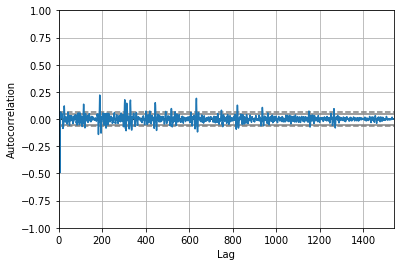

In [46]:
arima.corr_check(df_ysum_diff6)

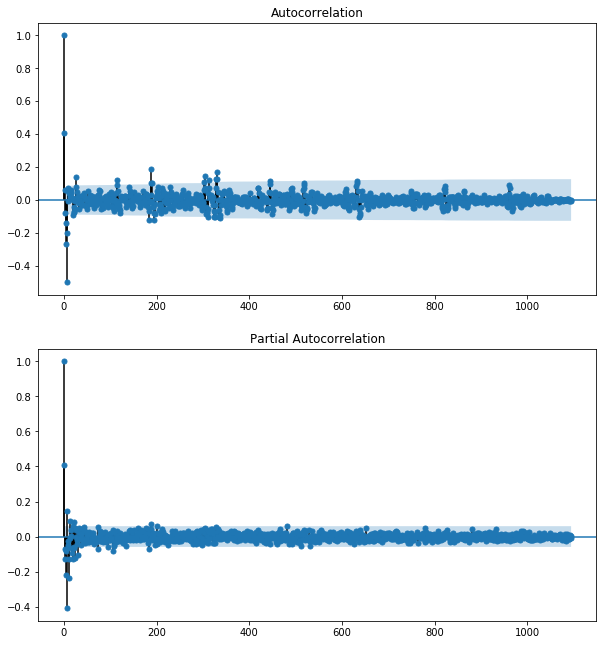

In [42]:
arima.acf_plot(df_ysum_diff6)

* 상관관계가 높게 나타났던 114일을 기준으로 차분해 보았습니다.

In [43]:
df_ysum_diff114= arima.diff(data_return.grabdata[data_return.grabdata['weekday']!= 6].y_sum, 114, '114day')

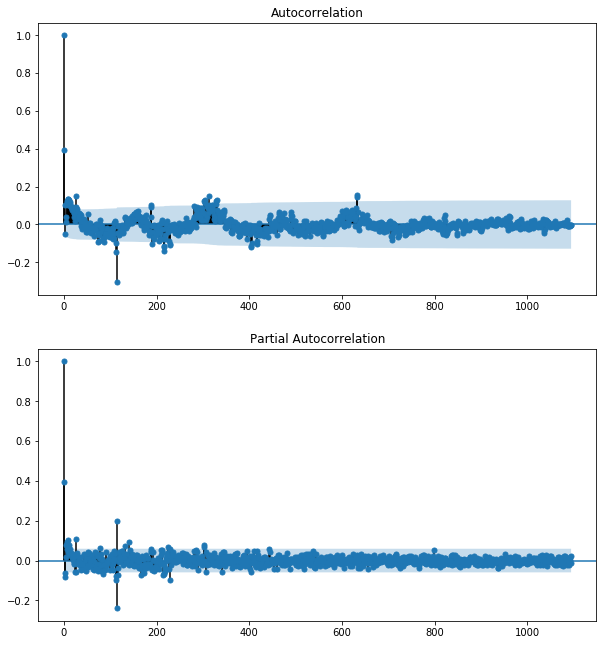

In [44]:
arima.acf_plot(df_ysum_diff114)

lag 0: corr 1.0
lag 1: corr 0.3978476844969456
lag 313: corr 0.26197772791806245
lag 304: corr 0.24763644247811448
lag 303: corr 0.2116895403330885
lag 305: corr 0.18531967364833793
lag 312: corr 0.1661273935836615
lag 329: corr 0.16504432573907016
lag 330: corr 0.16426697638963392
lag 321: corr 0.16264213129276944
lag 26: corr 0.1614632670449749
lag 314: corr 0.15257982647112683
lag 320: corr 0.1513303773873791
lag 287: corr 0.14986899942238044
lag 12: corr 0.14239719184786168
lag 309: corr 0.1385864962753016
lag 6: corr 0.1370639605800434
lag 10: corr 0.13661887650760102
lag 328: corr 0.13652789812892105
lag 13: corr 0.1359013621356699
lag 11: corr 0.13397625054064785
lag 8: corr 0.13348358503237193
lag 311: corr 0.13275654446732174
lag 293: corr 0.1293158691063304
lag 319: corr 0.1291636491131298
lag 7: corr 0.1235452933154333
lag 286: corr 0.12304591868631964
lag 281: corr 0.12266182942636822
lag 17: corr 0.12226292979469609
lag 317: corr 0.12096298332439229
lag 14: corr 0.12050519

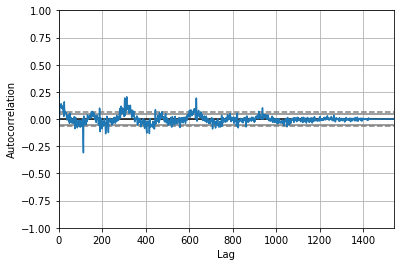

In [45]:
arima.corr_check(df_ysum_diff114)